# Domain
IoT and Sensor Data

# Content
This dataset contains about 10 years of daily weather observations from many locations across Australia

# Problem Statement
Develop a predictive classifier to predict the next-day rain on the target variable, 'RainTomorrow' with the help of IoT Sensor devices used for Temperature,Humidity,Rainfall,Pressure,Cloud obscured portions of the sky,Direction and Speed of Wind Measurement.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading data into Python environment
df=pd.read_csv("C:\\Users\\adilv\\Downloads\\Weather_Data.csv")
df

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,Row101816,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,56.0,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,0
99512,Row101817,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0
99513,Row101818,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0
99514,Row101819,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0


# Exploratory Data Analysis

In [4]:
# Head of the data
df.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [5]:
# Tail of the data
df.tail()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
99511,Row101816,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,56.0,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,0
99512,Row101817,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0
99513,Row101818,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0
99514,Row101819,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0
99515,Row101820,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0


In [6]:
# Shape of the data
df.shape

(99516, 23)

In [7]:
# Columns in the data
df.columns

Index(['row ID', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
# Index of the data
df.index

RangeIndex(start=0, stop=99516, step=1)

In [9]:
# Details of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

In [10]:
# Columns having object datatypes only
obj_col=df.select_dtypes(include=object).columns
obj_col

Index(['row ID', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday'],
      dtype='object')

In [11]:
num_col=df.select_dtypes(include='number').columns
num_col

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainTomorrow'],
      dtype='object')

Location,row ID, WindGustDir,WindDir9am,WindDir3pm and RainToday are object datatypes

In [ ]:
# 'RainTomorrow' is the target column

In [12]:
# Summary of the data
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,99073.000000,99286.000000,98537.000000,56985.00000,52199.000000,93036.000000,98581.000000,97681.000000,98283.000000,97010.000000,89768.000000,89780.000000,61944.000000,59514.000000,98902.000000,97612.000000,99516.000000
mean,12.176266,23.218513,2.353024,5.46132,7.615090,39.976966,14.004849,18.650464,68.866376,51.433296,1017.684638,1015.286204,4.447985,4.519122,16.970041,21.681340,0.224677
std,6.390882,7.115072,8.487866,4.16249,3.783008,13.581524,8.902323,8.801827,19.074951,20.777616,7.110166,7.045189,2.886580,2.716618,6.488961,6.931681,0.417372
min,-8.500000,-4.100000,0.000000,0.00000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.000000,-5.100000,0.000000
25%,7.600000,17.900000,0.000000,2.60000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.80000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.40000,10.600000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.400000,0.000000
max,33.900000,48.100000,371.000000,86.20000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000


In [13]:
# The minimum values of Temperature columns are Negative

In [14]:
# Number of Unique values for each column in the data
df.nunique()

row ID           99516
Location            49
MinTemp            386
MaxTemp            500
Rainfall           601
Evaporation        327
Sunshine           145
WindGustDir         16
WindGustSpeed       67
WindDir9am          16
WindDir3pm          16
WindSpeed9am        43
WindSpeed3pm        44
Humidity9am        101
Humidity3pm        101
Pressure9am        536
Pressure3pm        536
Cloud9am            10
Cloud3pm            10
Temp9am            432
Temp3pm            491
RainToday            2
RainTomorrow         2
dtype: int64

In [15]:
# Unique values in the column 'Location'
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [16]:
# Unique values in the column 'WindGustDir'
df['WindGustDir'].unique()

array(['W', 'WNW', 'N', 'NNE', 'SW', 'ENE', 'SSE', 'NE', 'WSW', 'NNW',
       'S', 'ESE', nan, 'NW', 'E', 'SSW', 'SE'], dtype=object)

In [17]:
# Unique values in the column 'WindDir9am'
df['WindDir9am'].unique()

array(['W', 'NNW', 'ENE', 'SSE', 'S', 'NE', nan, 'SSW', 'N', 'WSW', 'SE',
       'ESE', 'E', 'NW', 'NNE', 'SW', 'WNW'], dtype=object)

In [18]:
# Unique values in the column 'WindDir3pm'
df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'SSW', 'E', 'SW',
       'NNW', 'N', 'S', nan, 'SE', 'NNE', 'NE'], dtype=object)

In [19]:
# Checking Missing values in the data
df.isna().sum()

row ID               0
Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64

In [20]:
# Checking null values in train data
((df.isna().sum()/len(df))*100).round(3)

row ID            0.000
Location          0.000
MinTemp           0.445
MaxTemp           0.231
Rainfall          0.984
Evaporation      42.738
Sunshine         47.547
WindGustDir       6.553
WindGustSpeed     6.512
WindDir9am        7.040
WindDir3pm        2.661
WindSpeed9am      0.940
WindSpeed3pm      1.844
Humidity9am       1.239
Humidity3pm       2.518
Pressure9am       9.795
Pressure3pm       9.783
Cloud9am         37.755
Cloud3pm         40.197
Temp9am           0.617
Temp3pm           1.913
RainToday         0.984
RainTomorrow      0.000
dtype: float64

In [21]:
# Except the columns row ID,Location and RainTomorrow,the other 20 columns have null values

In [22]:
# Min and Max values of MinTemp
df['MinTemp'].min(),df['MinTemp'].max()

(-8.5, 33.9)

In [23]:
# Min and Max values of MaxTemp
df['MaxTemp'].min(),df['MaxTemp'].max()

(-4.1, 48.1)

In [24]:
# Min and Max values of the Speed of Wind Gust
df['WindGustSpeed'].min(),df['WindGustSpeed'].max()

(6.0, 135.0)

In [25]:
# Min and Max values of Wind Speed at 9am
df['WindSpeed9am'].min(),df['WindSpeed9am'].max()

(0.0, 130.0)

In [26]:
# Min and Max values of Wind Speed at 3pm
df['WindSpeed3pm'].min(),df['WindSpeed3pm'].max()

(0.0, 87.0)

In [27]:
# Min and Max values of Humidity at 9am
df['Humidity9am'].min(),df['Humidity9am'].max()

(0.0, 100.0)

In [28]:
# Min and Max values of Humidity at 3pm
df['Humidity3pm'].min(),df['Humidity3pm'].max()

(0.0, 100.0)

In [29]:
# Min and Max values of Pressure at 9am
df['Pressure9am'].min(),df['Pressure9am'].max()

(980.5, 1041.0)

In [30]:
# Min and Max values of Pressure at 3pm
df['Pressure3pm'].min(),df['Pressure3pm'].max()

(978.2, 1039.6)

In [31]:
# Min and Max values of Cloud at 9am 
df['Cloud9am'].min(),df['Cloud9am'].max()

(0.0, 9.0)

In [32]:
# Min and Max values of Cloud at 3pm
df['Cloud3pm'].min(),df['Cloud3pm'].max()

(0.0, 9.0)

In [33]:
# Min and Max values of Temp at 9am
df['Temp9am'].min(),df['Temp9am'].max()

(-7.0, 40.2)

In [34]:
# Min and Max values of Temp at 3pm
df['Temp3pm'].min(),df['Temp3pm'].max()

(-5.1, 46.7)

In [35]:
# Min and Max values of Rainfall
df['Rainfall'].min(),df['Rainfall'].max()

(0.0, 371.0)

In [36]:
# Min and Max values of Evaporation
df['Evaporation'].min(),df['Evaporation'].max()

(0.0, 86.2)

In [37]:
# Min and Max values of Sunshine
df['Sunshine'].min(),df['Sunshine'].max()

(0.0, 14.5)

In [38]:
# Count of unique values in the column 'RainToday'
df['RainToday'].value_counts()

No     76481
Yes    22056
Name: RainToday, dtype: int64

In [39]:
# Count of unique values in the column 'RainTomorrow'
df['RainTomorrow'].value_counts()

0    77157
1    22359
Name: RainTomorrow, dtype: int64

In [40]:
# Count of unique values in the column 'MinTemp'
df['MinTemp'].value_counts()

 11.0    649
 10.5    624
 9.7     620
 10.8    615
 9.6     612
        ... 
-7.5       1
-7.6       1
-7.1       1
-8.5       1
 30.2      1
Name: MinTemp, Length: 386, dtype: int64

In [41]:
# Count of unique values in the column 'MaxTemp'
df['MaxTemp'].value_counts()

 20.0    615
 19.8    603
 20.4    597
 19.0    577
 18.5    565
        ... 
 2.8       1
-2.3       1
-2.7       1
-1.2       1
 46.1      1
Name: MaxTemp, Length: 500, dtype: int64

In [42]:
# Count of unique values in the column 'WindGustSpeed'
df['WindGustSpeed'].value_counts()

35.0     6353
39.0     6074
31.0     5848
37.0     5563
33.0     5404
         ... 
111.0       1
117.0       1
122.0       1
130.0       1
6.0         1
Name: WindGustSpeed, Length: 67, dtype: int64

In [43]:
# Count of unique values in the column 'WindSpeed9am'
df['WindSpeed9am'].value_counts()

9.0      9277
13.0     9027
11.0     8055
17.0     7470
7.0      7361
15.0     7275
6.0      6305
0.0      6035
19.0     5978
20.0     5539
4.0      4432
22.0     3912
24.0     3663
2.0      3211
26.0     2576
28.0     2453
30.0     1589
31.0     1387
33.0      757
35.0      676
37.0      400
39.0      298
41.0      211
43.0      181
44.0      141
46.0       99
48.0       67
50.0       56
52.0       44
56.0       30
54.0       28
57.0       12
61.0       10
63.0        7
65.0        4
74.0        3
59.0        3
69.0        2
87.0        2
67.0        2
130.0       1
83.0        1
72.0        1
Name: WindSpeed9am, dtype: int64

In [44]:
# Count of unique values in the column 'WindSpeed3pm'
df['WindSpeed3pm'].value_counts()

17.0    8620
13.0    8616
20.0    8052
15.0    7958
19.0    7699
11.0    6891
9.0     6691
24.0    6224
22.0    5876
28.0    4515
26.0    4453
7.0     4116
30.0    3126
31.0    2709
6.0     2561
33.0    1687
4.0     1523
35.0    1477
37.0     940
0.0      781
39.0     768
2.0      681
41.0     441
43.0     382
44.0     250
46.0     199
50.0     119
48.0     111
52.0      61
56.0      39
54.0      38
65.0      17
59.0      15
57.0      14
63.0      12
61.0       8
69.0       2
76.0       2
72.0       2
87.0       1
78.0       1
74.0       1
83.0       1
67.0       1
Name: WindSpeed3pm, dtype: int64

In [45]:
# Count of unique values in the column 'Humidity9am'
df['Humidity9am'].value_counts()

99.0    2362
68.0    2079
66.0    2079
70.0    2068
71.0    2057
        ... 
5.0       14
3.0        8
2.0        6
1.0        3
0.0        1
Name: Humidity9am, Length: 101, dtype: int64

In [46]:
# Count of unique values in the column 'Humidity3pm'
df['Humidity3pm'].value_counts()

52.0    1931
55.0    1878
58.0    1848
56.0    1845
54.0    1842
        ... 
4.0       71
3.0       41
2.0       22
1.0       21
0.0        4
Name: Humidity3pm, Length: 101, dtype: int64

In [47]:
# Count of unique values in the column 'Pressure9am'
df['Pressure9am'].value_counts()

1016.4    553
1017.9    541
1018.7    537
1017.2    536
1018.2    531
         ... 
988.0       1
992.2       1
1039.4      1
986.7       1
987.9       1
Name: Pressure9am, Length: 536, dtype: int64

In [48]:
# Count of unique values in the column 'Pressure3pm'
df['Pressure3pm'].value_counts()

1015.3    549
1013.5    545
1015.7    545
1015.6    543
1015.5    536
         ... 
992.2       1
981.2       1
988.4       1
1037.2      1
989.5       1
Name: Pressure3pm, Length: 536, dtype: int64

In [49]:
# Count of unique values in the column 'Cloud9am'
df['Cloud9am'].value_counts()

7.0    13875
1.0    10907
8.0    10129
0.0     5946
6.0     5633
2.0     4452
3.0     4096
5.0     3838
4.0     3066
9.0        2
Name: Cloud9am, dtype: int64

In [50]:
# Count of unique values in the column 'Cloud3pm'
df['Cloud3pm'].value_counts()

7.0    12759
1.0    10294
8.0     8677
6.0     6213
2.0     5005
5.0     4745
3.0     4734
4.0     3676
0.0     3410
9.0        1
Name: Cloud3pm, dtype: int64

In [51]:
# Count of unique values in the column 'Temp9am'
df['Temp9am'].value_counts()

 17.0    645
 14.8    625
 13.8    625
 16.0    621
 16.6    609
        ... 
 35.6      1
-3.8       1
 36.9      1
-7.0       1
 36.6      1
Name: Temp9am, Length: 432, dtype: int64

In [52]:
# Count of unique values in the column 'Temp3pm'
df['Temp3pm'].value_counts()

 18.5    609
 18.4    605
 19.2    594
 20.0    590
 17.8    587
        ... 
 46.7      1
-0.9       1
-4.1       1
 45.9      1
 43.8      1
Name: Temp3pm, Length: 491, dtype: int64

<b>Visualization</b>

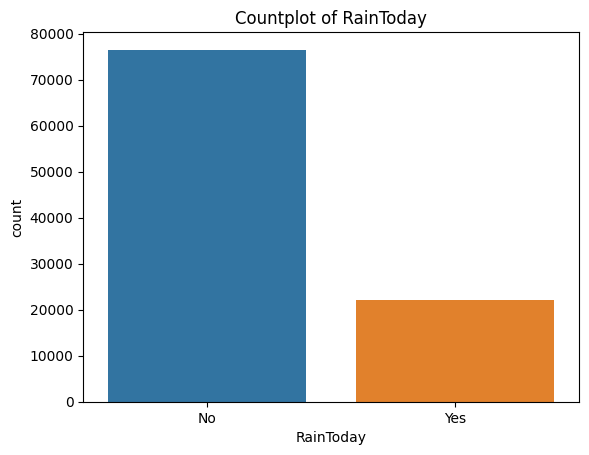

In [53]:
# Countplot
sns.countplot(df['RainToday'])
plt.title('Countplot of RainToday')
plt.show()

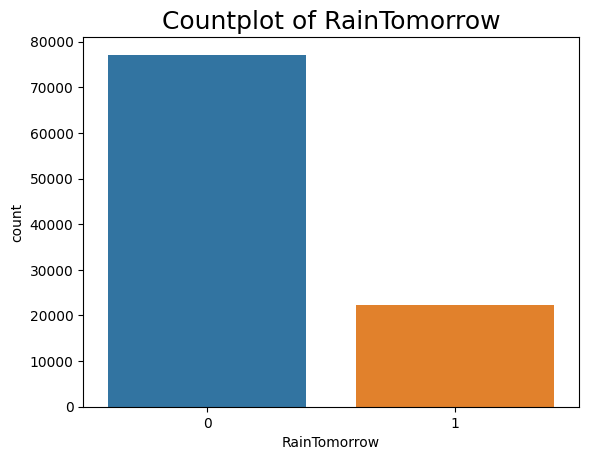

In [54]:
sns.countplot(df['RainTomorrow'])
plt.title('Countplot of RainTomorrow',fontsize=18)
plt.show()

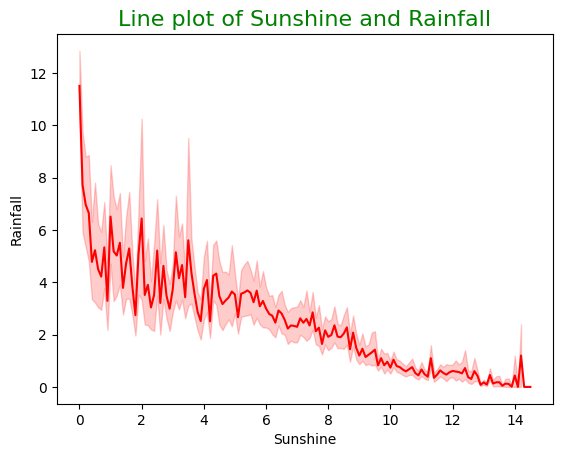

In [55]:
# Line plot
sns.lineplot(data=df,x='Sunshine',y='Rainfall',color='red')
plt.title('Line plot of Sunshine and Rainfall',fontsize=16,c='green')
plt.show()

In [ ]:
# The feature Sunshine is inversely proportional to Rainfall.

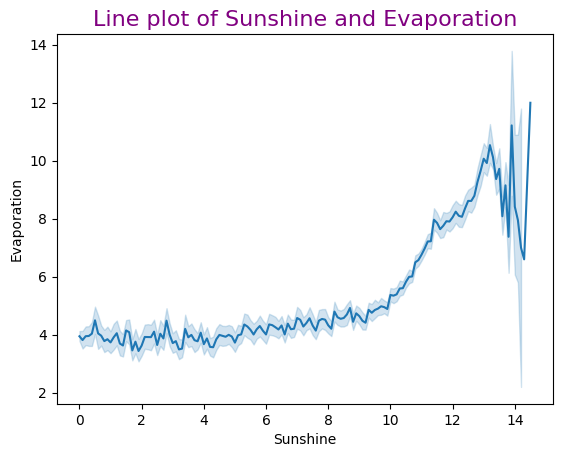

In [56]:
sns.lineplot(data=df,x='Sunshine',y='Evaporation')
plt.title('Line plot of Sunshine and Evaporation',fontsize=16,c='purple')
plt.show()

In [ ]:
# The feature Sunshine is proportional to Evaporation.

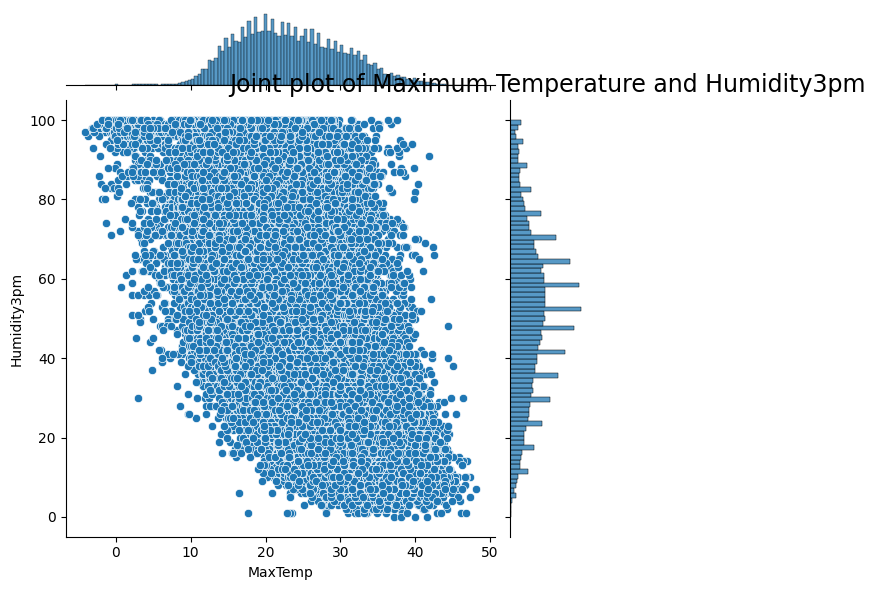

In [57]:
# Joint plot
sns.jointplot(data=df,x='MaxTemp',y='Humidity3pm')
plt.title('Joint plot of Maximum Temperature and Humidity3pm',fontsize=17)
plt.show()

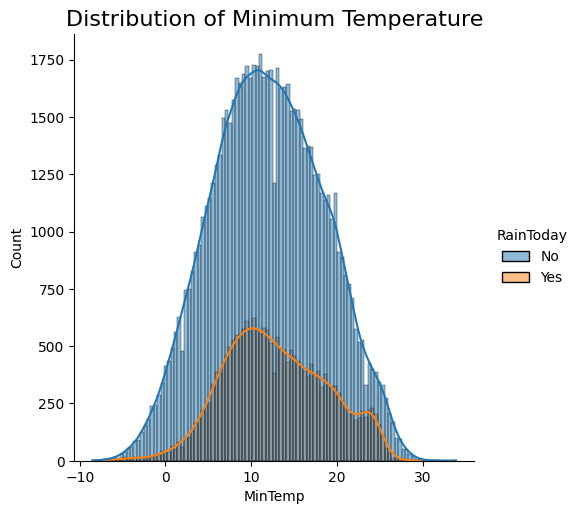

In [58]:
# Distribution plot with respect to the feature 'RainToday'
sns.displot(df,x='MinTemp',hue='RainToday',kde=True)
plt.title('Distribution of Minimum Temperature',fontsize=16)
plt.show()

In [ ]:
# The range of Minimum Temperature is from -8.5°C to 33.9°C

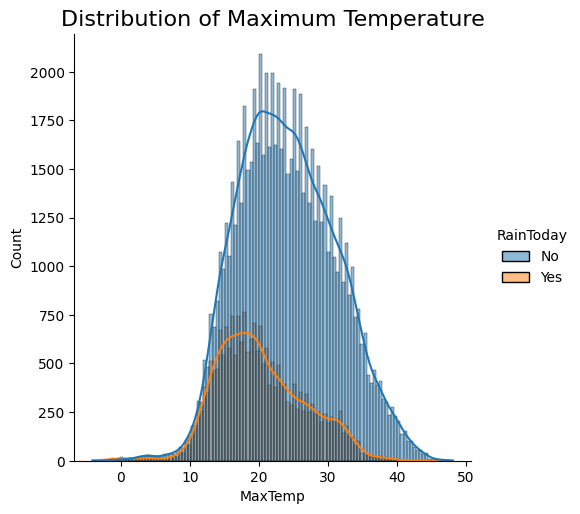

In [59]:
sns.displot(df,x='MaxTemp',hue='RainToday',kde=True)
plt.title('Distribution of Maximum Temperature',fontsize=16)
plt.show()

In [ ]:
# The range of Maximum Temperature is from -4.1°C to 48.1°C

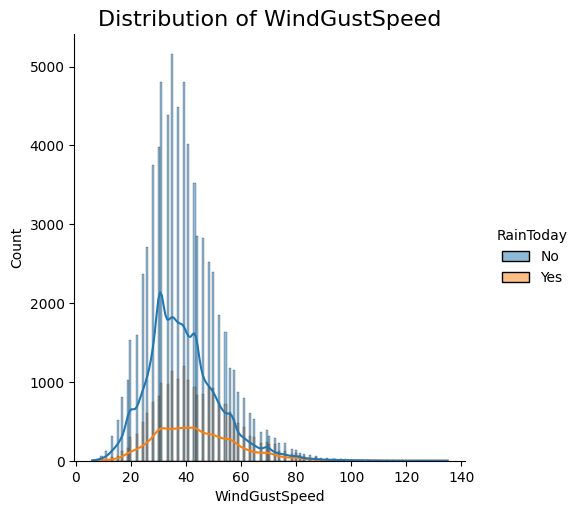

In [60]:
sns.displot(df,x='WindGustSpeed',hue='RainToday',kde=True)
plt.title('Distribution of WindGustSpeed',fontsize=16)
plt.show()

In [ ]:
# The range of WindGustSpeed is from 6 kmph to 135 kmph

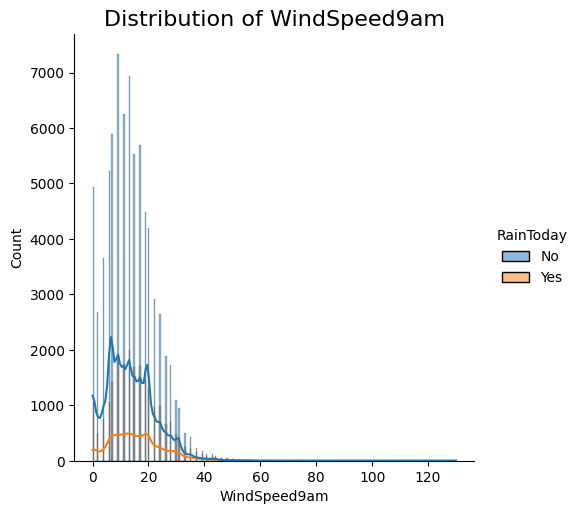

In [61]:
sns.displot(df,x='WindSpeed9am',hue='RainToday',kde=True)
plt.title('Distribution of WindSpeed9am',fontsize=16)
plt.show()

In [ ]:
# The range of Wind Speed at 9am is from 0 to 130 kmph

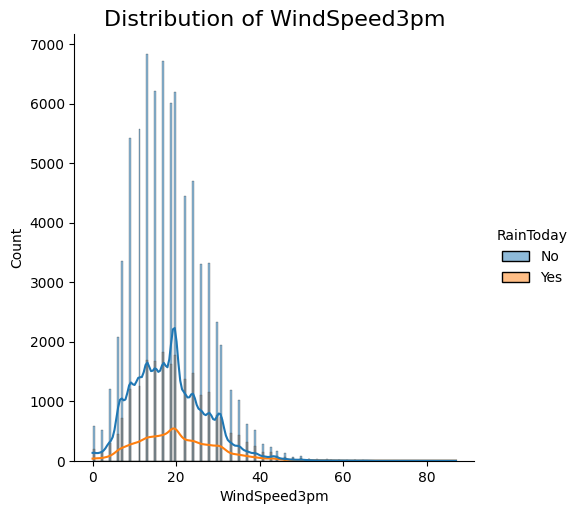

In [62]:
sns.displot(df,x='WindSpeed3pm',hue='RainToday',kde=True)
plt.title('Distribution of WindSpeed3pm',fontsize=16)
plt.show()

In [ ]:
# The range of Wind Speed at 3pm is from 0 to 87 kmph

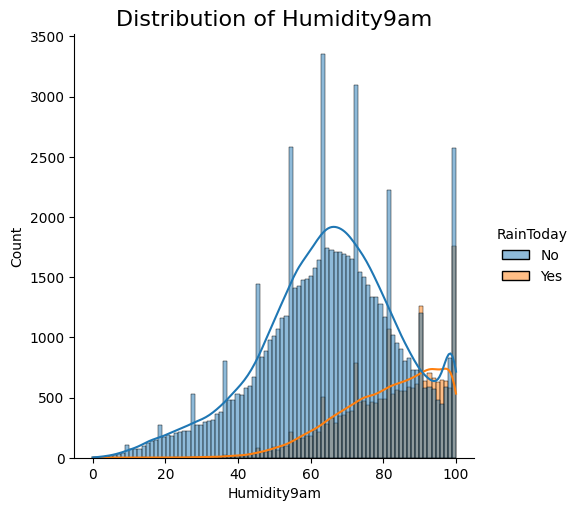

In [63]:
sns.displot(df,x='Humidity9am',hue='RainToday',kde=True)
plt.title('Distribution of Humidity9am',fontsize=16)
plt.show()

In [ ]:
# The range of Humidity at 9am is from 0 to 100%

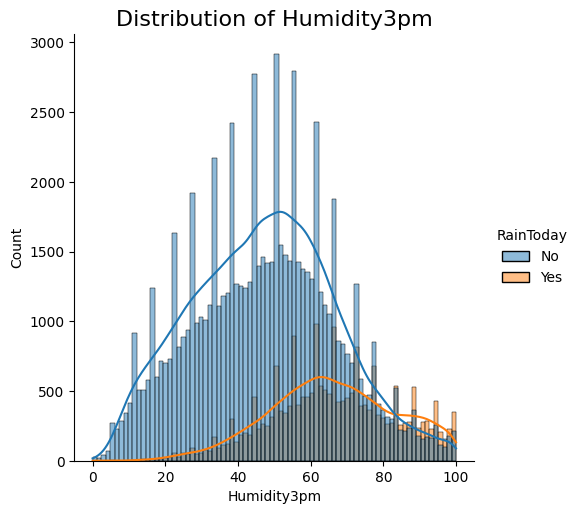

In [64]:
sns.displot(df,x='Humidity3pm',hue='RainToday',kde=True)
plt.title('Distribution of Humidity3pm',fontsize=16)
plt.show()

In [ ]:
# The range of Humidity at 3pm is from 0 to 100%

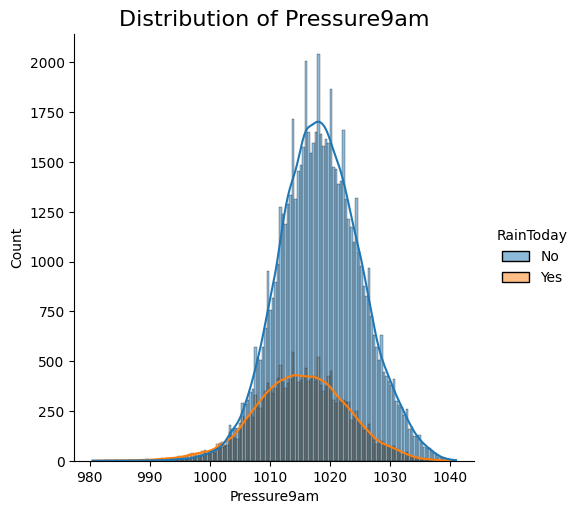

In [65]:
sns.displot(df,x='Pressure9am',hue='RainToday',kde=True)
plt.title('Distribution of Pressure9am',fontsize=16)
plt.show()

In [ ]:
# The range of Pressure at 9am is from 980.5 to 1040.2 hPa

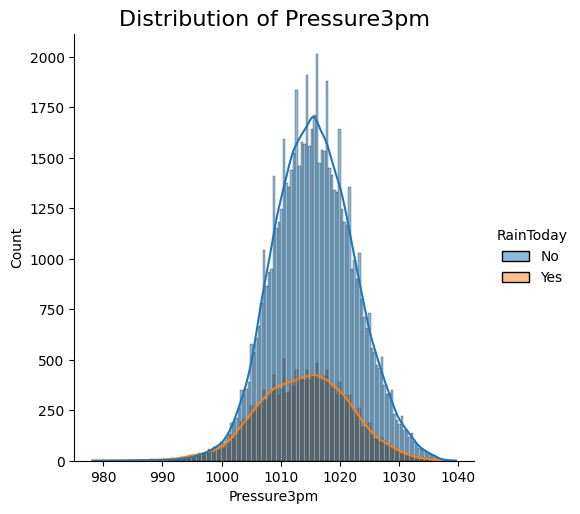

In [66]:
sns.displot(df,x='Pressure3pm',hue='RainToday',kde=True)
plt.title('Distribution of Pressure3pm',fontsize=16)
plt.show()

In [ ]:
# The range of Pressure at 3pm is from 978.2 to 1039 hPa

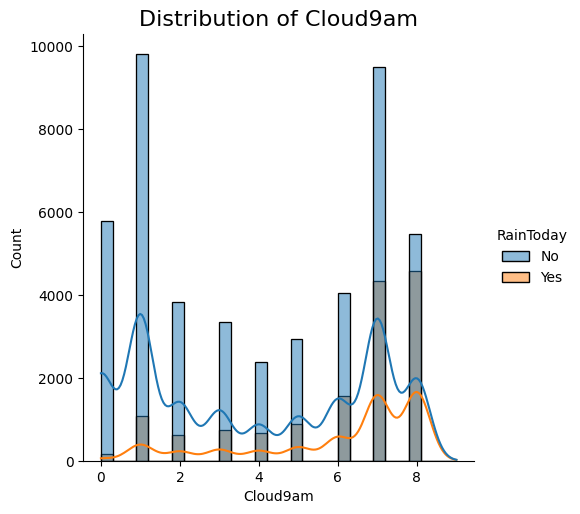

In [67]:
sns.displot(df,x='Cloud9am',hue='RainToday',kde=True)
plt.title('Distribution of Cloud9am',fontsize=16)
plt.show()

In [ ]:
# The range of Cloud at 9am is from 0 to 9 eighths

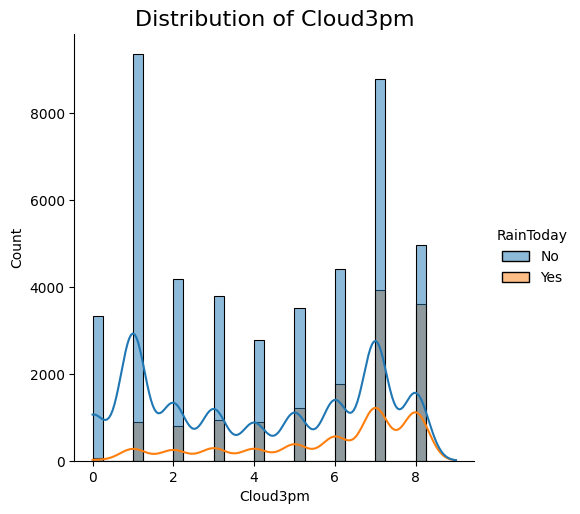

In [68]:
sns.displot(df,x='Cloud3pm',hue='RainToday',kde=True)
plt.title('Distribution of Cloud3pm',fontsize=16)
plt.show()

In [ ]:
# The range of Cloud at 3pm is from 0 to 9 eighths

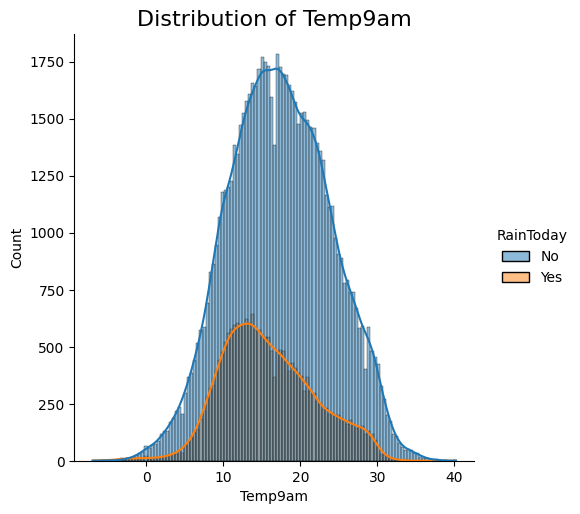

In [69]:
sns.displot(df,x='Temp9am',hue='RainToday',kde=True)
plt.title('Distribution of Temp9am',fontsize=16)
plt.show()

In [ ]:
# The range of Temp at 9am is from -7°C to 40.1°C

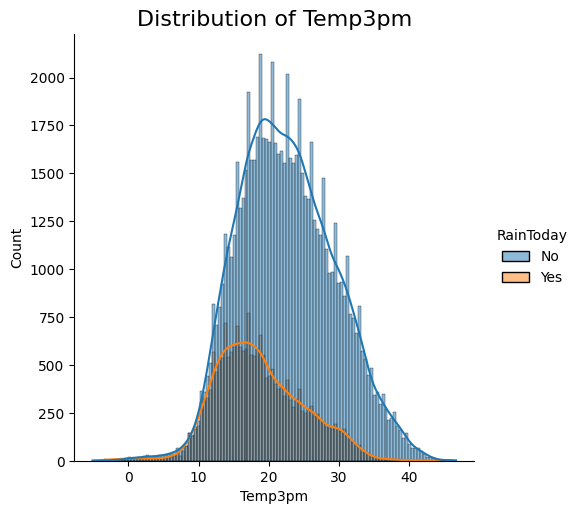

In [70]:
sns.displot(df,x='Temp3pm',hue='RainToday',kde=True)
plt.title('Distribution of Temp3pm',fontsize=16)
plt.show()

In [ ]:
# The range of Temp at 3pm is from -5.1°C to 46.7°C

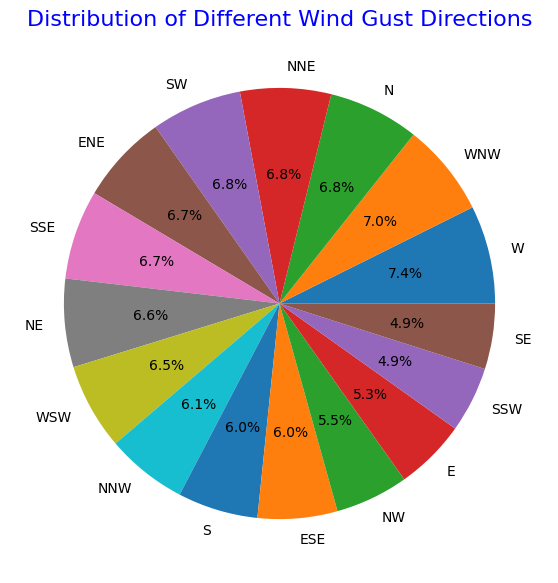

In [71]:
# Pie chart
plt.figure(figsize=(7,7))
plt.pie(df['WindGustDir'].value_counts(),autopct='%1.1f%%',labels=['W','WNW','N','NNE','SW','ENE','SSE','NE','WSW','NNW','S','ESE','NW','E','SSW','SE'])
plt.title('Distribution of Different Wind Gust Directions',color='blue',fontsize=16)
plt.show()

In [ ]:
# The Wind Gust Direction is more from the west.

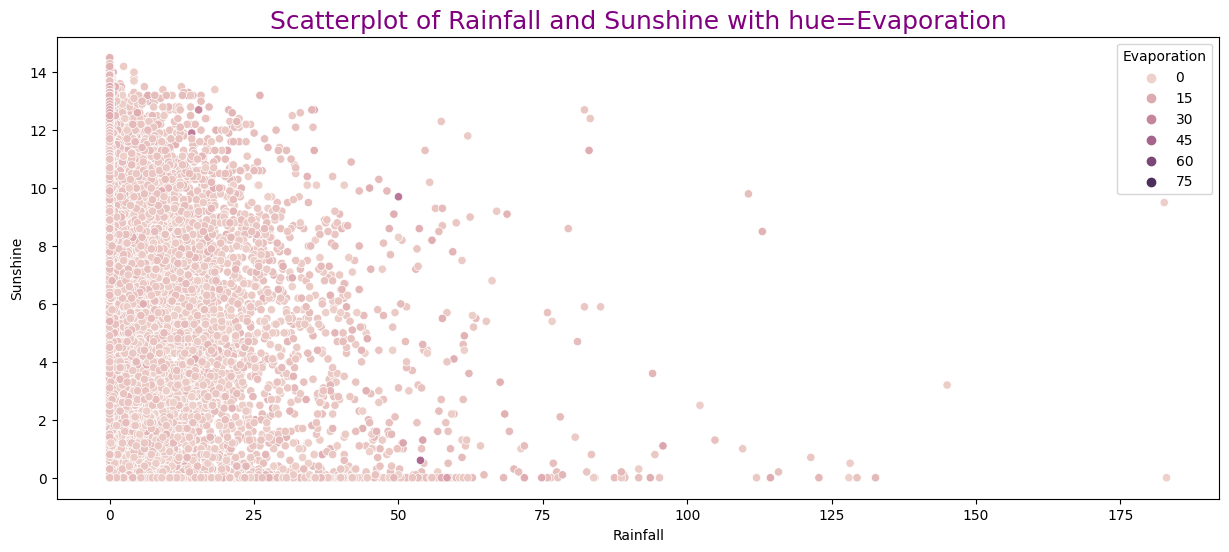

In [72]:
# Scatterplot
plt.figure(figsize=(15,6))
sns.scatterplot(df['Rainfall'],df['Sunshine'],hue=df['Evaporation'])
plt.title('Scatterplot of Rainfall and Sunshine with hue=Evaporation',color='Purple',fontsize=18)
plt.show()

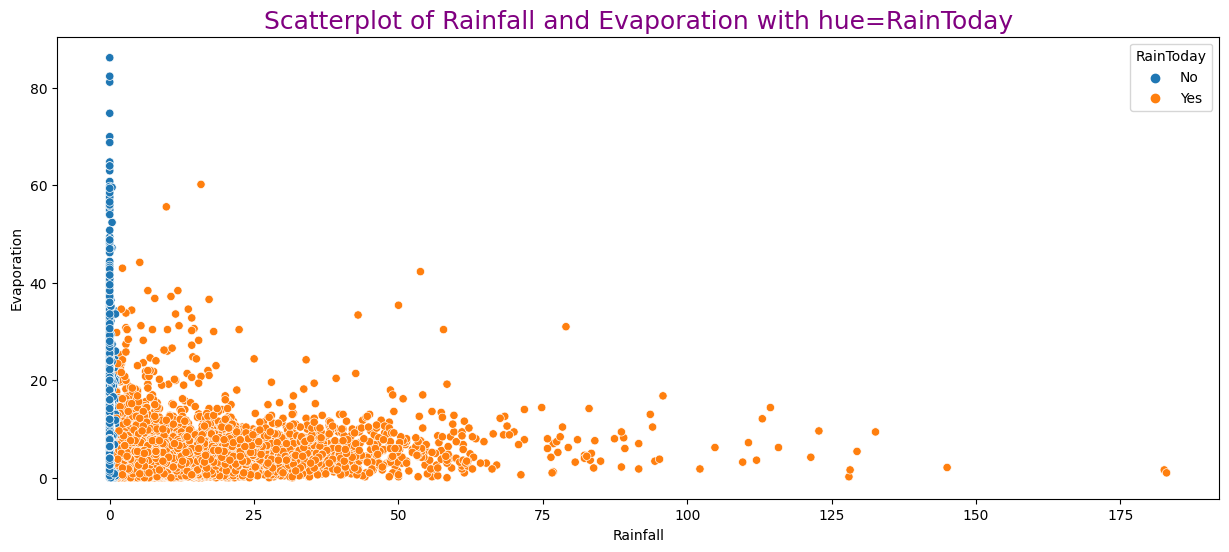

In [73]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df,x='Rainfall',y='Evaporation',hue='RainToday')
plt.title('Scatterplot of Rainfall and Evaporation with hue=RainToday',color='Purple',fontsize=18)
plt.show()

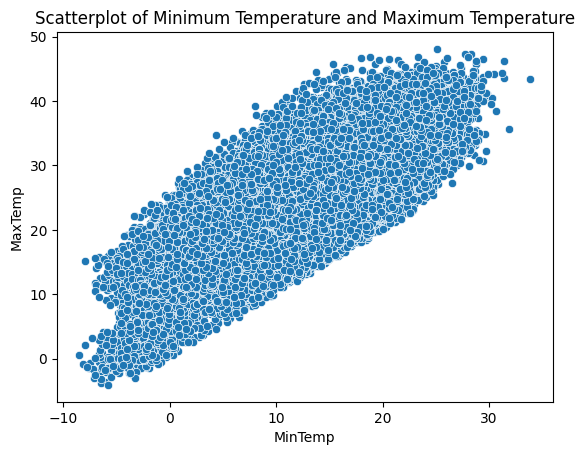

In [74]:
sns.scatterplot(df['MinTemp'],df['MaxTemp'])
plt.title('Scatterplot of Minimum Temperature and Maximum Temperature')
plt.show()

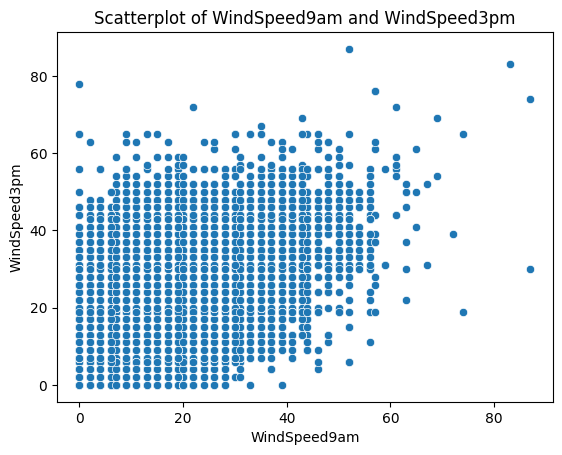

In [75]:
sns.scatterplot(df['WindSpeed9am'],df['WindSpeed3pm'])
plt.title('Scatterplot of WindSpeed9am and WindSpeed3pm')
plt.show()

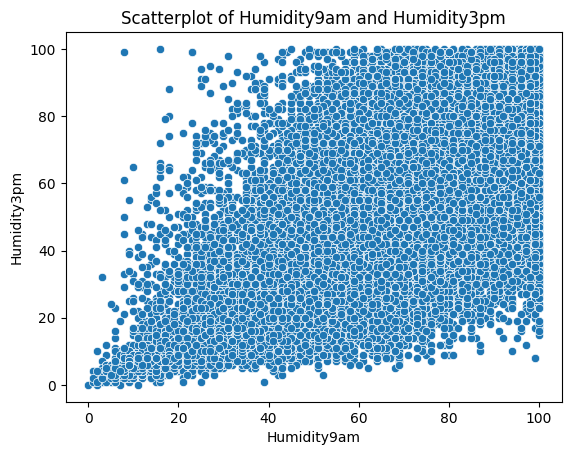

In [76]:
sns.scatterplot(df['Humidity9am'],df['Humidity3pm'])
plt.title('Scatterplot of Humidity9am and Humidity3pm')
plt.show()

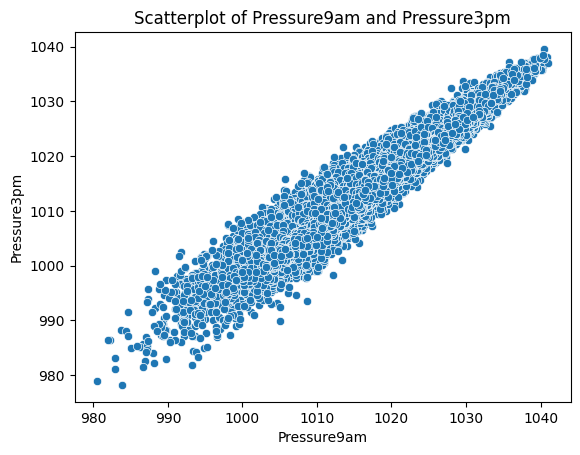

In [77]:
sns.scatterplot(df['Pressure9am'],df['Pressure3pm'])
plt.title('Scatterplot of Pressure9am and Pressure3pm')
plt.show()

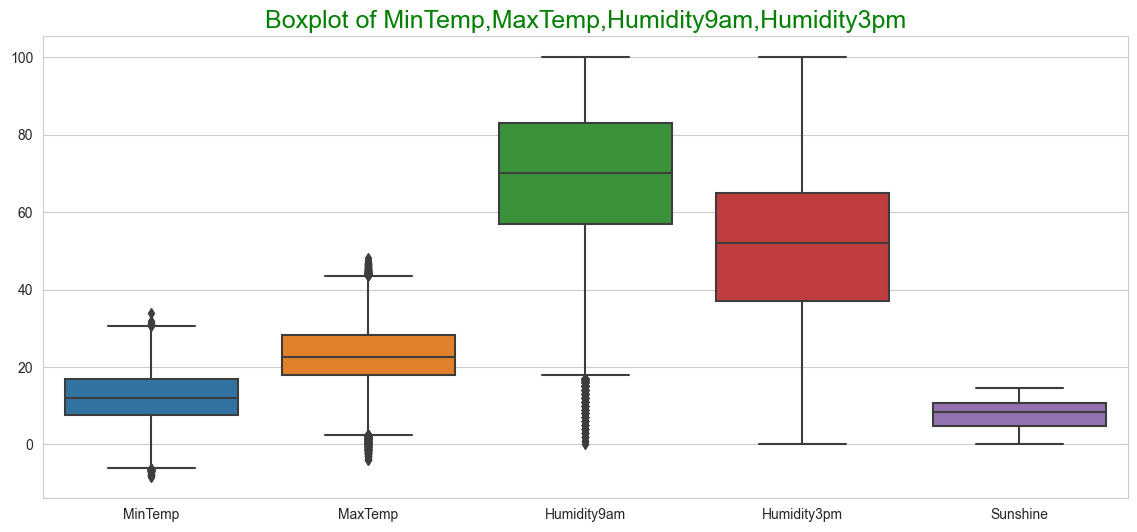

In [78]:
# Box plot
plt.figure(figsize=(14,6))
sns.set_style('whitegrid')
sns.boxplot(data=df[['MinTemp','MaxTemp','Humidity9am','Humidity3pm','Sunshine']])
plt.title('Boxplot of MinTemp,MaxTemp,Humidity9am,Humidity3pm',c='green',fontsize=18)
plt.show()

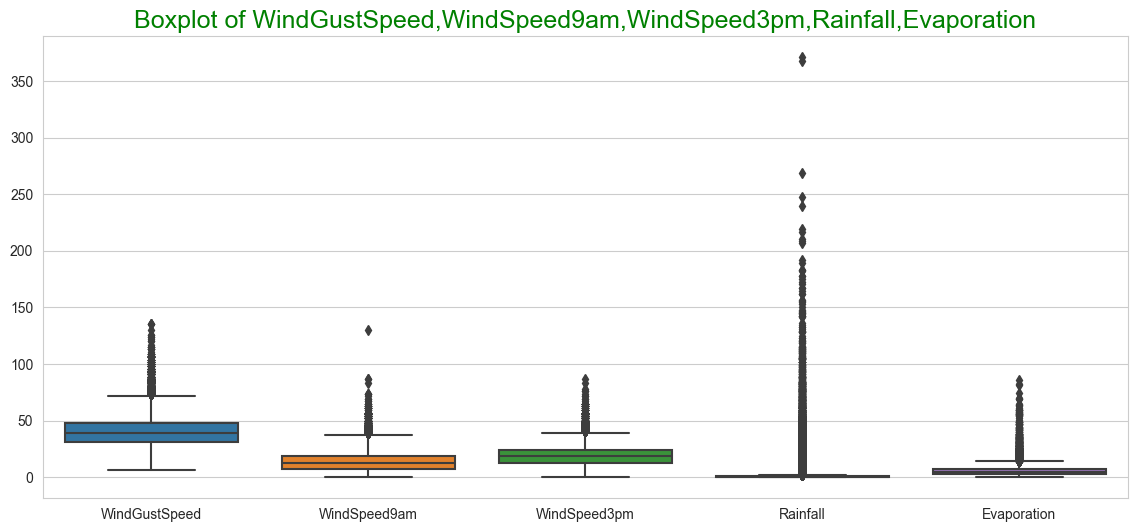

In [79]:
plt.figure(figsize=(14,6))
sns.set_style('whitegrid')
sns.boxplot(data=df[['WindGustSpeed','WindSpeed9am','WindSpeed3pm','Rainfall','Evaporation']])
plt.title('Boxplot of WindGustSpeed,WindSpeed9am,WindSpeed3pm,Rainfall,Evaporation',c='green',fontsize=18)
plt.show()

Text(0.5, 1.0, 'Boxplot of WindGustSpeed,WindSpeed9am,WindSpeed3pm,Rainfall,Evaporation')

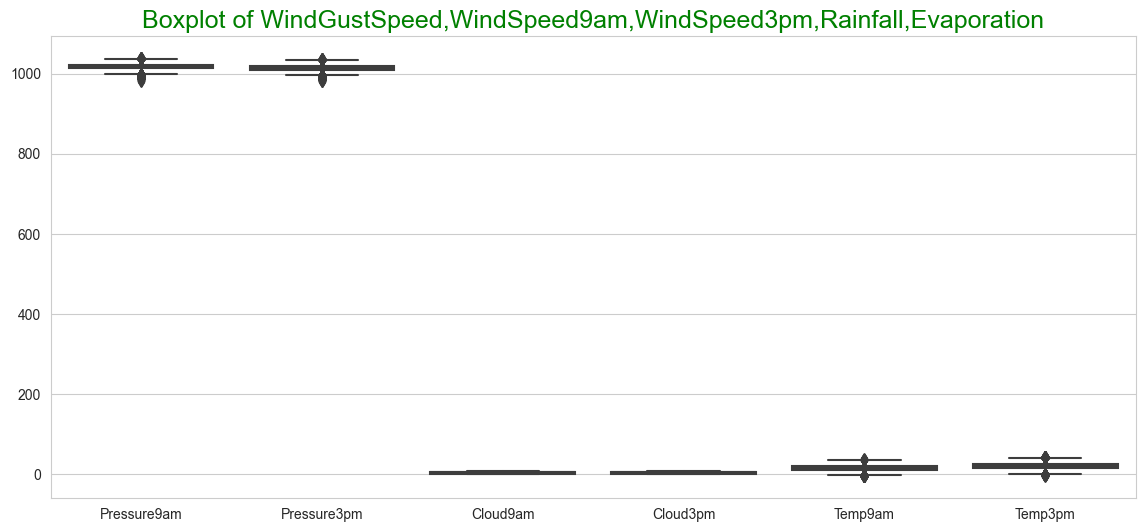

In [80]:
plt.figure(figsize=(14,6))
sns.set_style('whitegrid')
sns.boxplot(data=df[['Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']])
plt.title('Boxplot of WindGustSpeed,WindSpeed9am,WindSpeed3pm,Rainfall,Evaporation',c='green',fontsize=18)

In [81]:
# There are outliers in the columns MinTemp,MaxTemp,Humidity9am,WindGustSpeed,WindSpeed9am,
# WindSpeed3pm,Pressure9am,Pressure3pm,Temp9am and Temp3pm

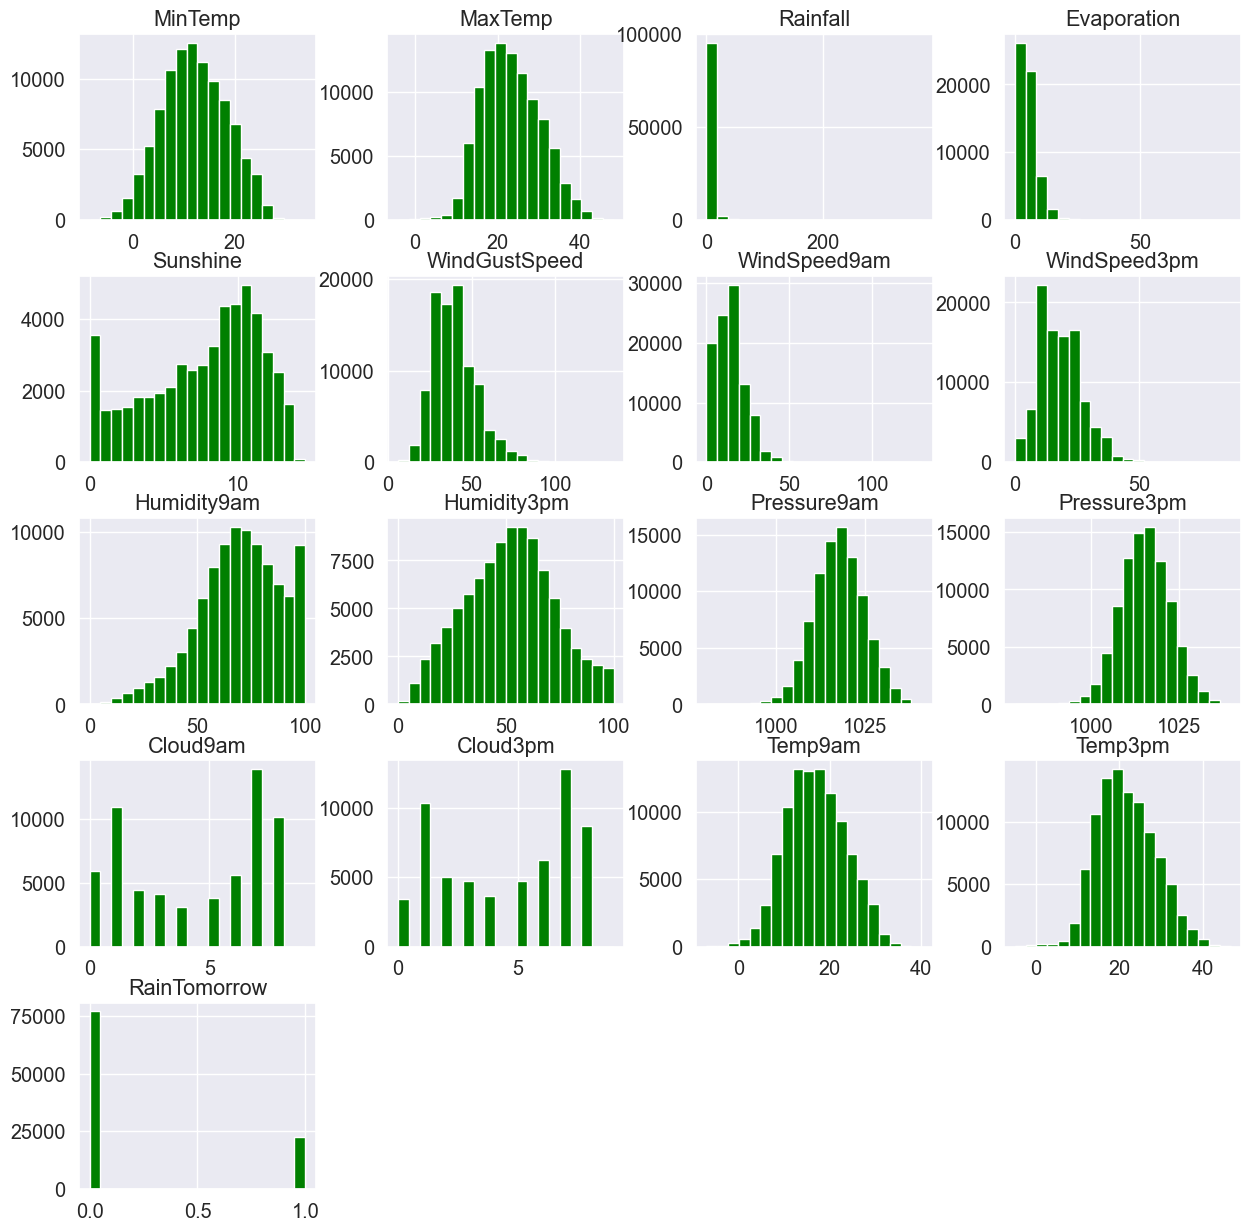

In [82]:
# Univariate Analysis
plt.rcParams['figure.figsize']=15,15
sns.set(style='darkgrid',font_scale=1.3)
ax=df.hist(bins=20,color='green')
plt.show()

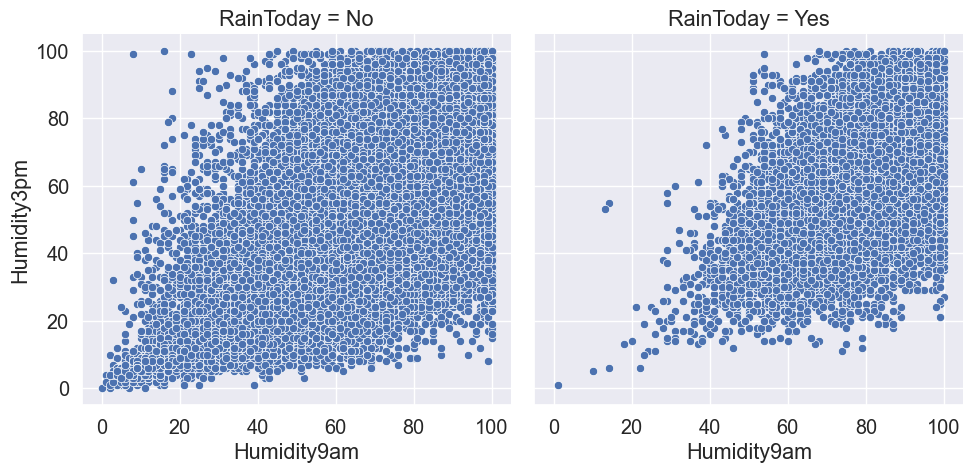

In [83]:
# Relational plot
sns.relplot(x=df['Humidity9am'],y=df['Humidity3pm'],col=df['RainToday'])
# plt.title('Relational Plot of Humidity at 9am and 3pm with RainToday',fontsize=16)
plt.show()

<AxesSubplot:>

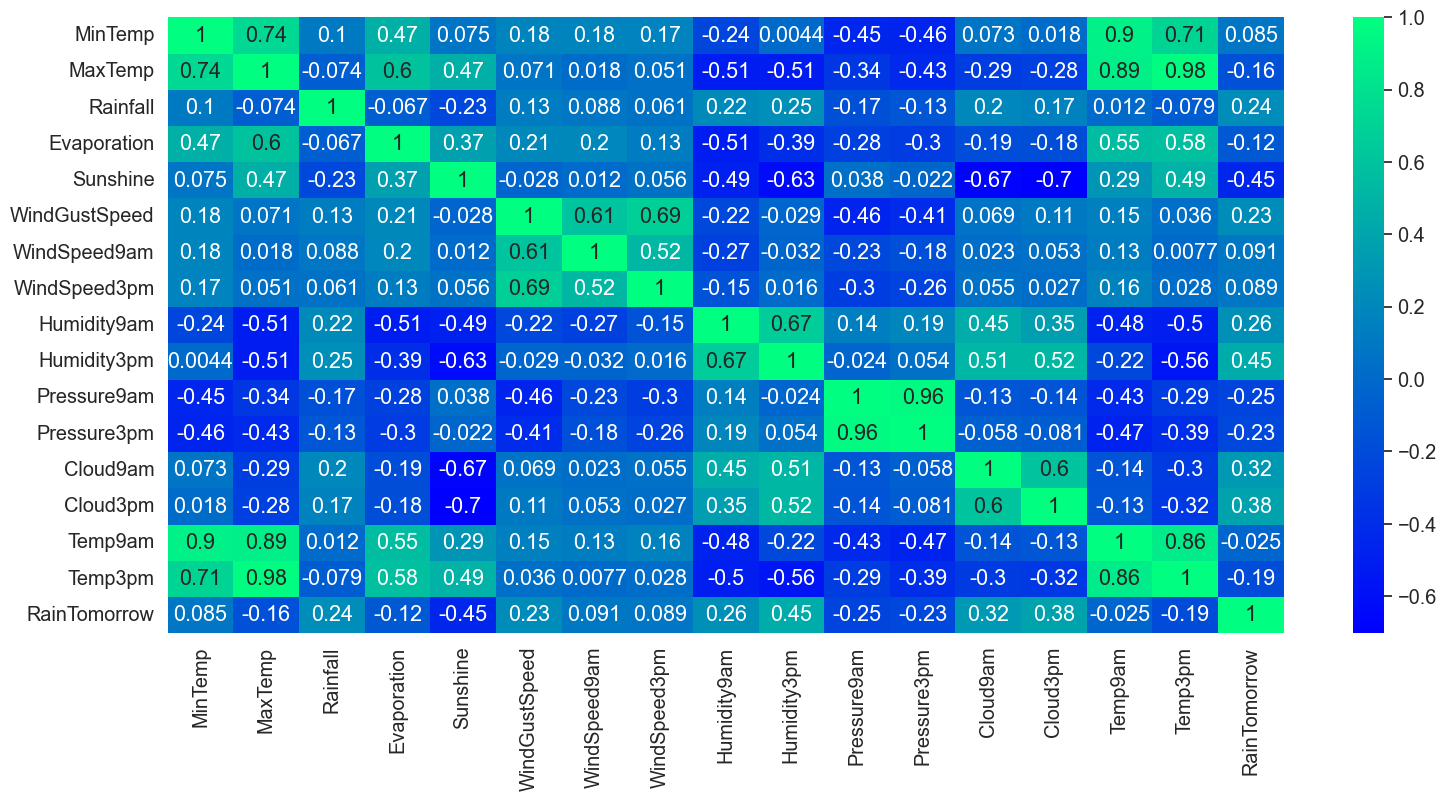

In [84]:
# Correlation plot
corr_matrix=df.corr()
plt.subplots(figsize=(18,8))
sns.heatmap(corr_matrix,annot=True,cmap='winter')

Highly positive correlated : MinTemp and MaxTemp , MinTemp and Temp9am , MinTemp and Temp3pm MaxTemp and Temp9am , MaxTemp and Temp3pm , Pressure9am and Pressure 3pm, Temp9am and Temp 3pm

Negatively correlated : Sunshine and Cloud9am , Sunshine and Cloud3pm

The columns MaxTemp,Evaporation,Sunshine,Pressure9am,Pressure3pm,Temp9am and Temp3pm have less negative correlation with the Target variable,'RainTomorrow'.

<b>Data Pre-processing</b>

In [85]:
# Dropping the unnecessary features after checking the correlation from correlation plot
# Dropped the feature 'Cloud3pm' as there are null values in 4000 consecutive rows for particular locations.
# 40% of the values are missing.
df1=df.drop(['row ID','Rainfall','MinTemp','Evaporation','Sunshine','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Cloud9am','Cloud3pm','Temp9am','Temp3pm'],axis=1)

In [86]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       99516 non-null  object 
 1   MaxTemp        99286 non-null  float64
 2   WindGustDir    92995 non-null  object 
 3   WindGustSpeed  93036 non-null  float64
 4   WindDir9am     92510 non-null  object 
 5   WindDir3pm     96868 non-null  object 
 6   Humidity3pm    97010 non-null  float64
 7   Pressure3pm    89780 non-null  float64
 8   RainToday      98537 non-null  object 
 9   RainTomorrow   99516 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 7.6+ MB


<b>Handling Missing Values</b>

In [87]:
df1.isna().sum()

Location            0
MaxTemp           230
WindGustDir      6521
WindGustSpeed    6480
WindDir9am       7006
WindDir3pm       2648
Humidity3pm      2506
Pressure3pm      9736
RainToday         979
RainTomorrow        0
dtype: int64

<AxesSubplot:>

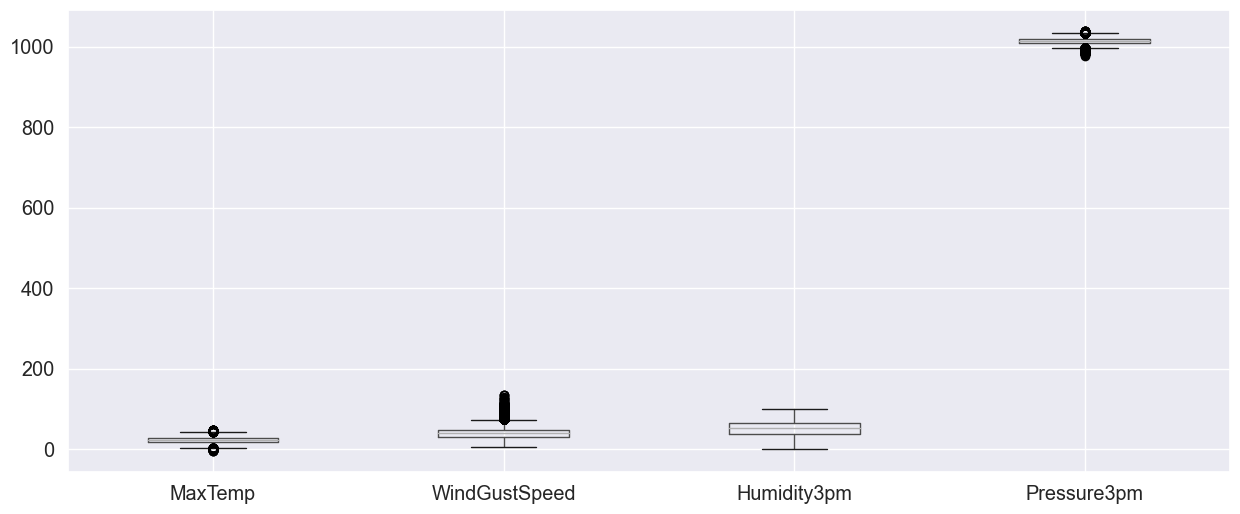

In [88]:
# Plotting Box plot to check outliers
df1.boxplot(column=['MaxTemp','WindGustSpeed','Humidity3pm','Pressure3pm'],figsize=(15,6))

In [89]:
# Filling the missing values in MaxTemp, WindGustSpeed and Pressure3pm with median as mean is sensitive to outliers
df1['MaxTemp']=df1['MaxTemp'].fillna(df1['MaxTemp'].median())
df1['WindGustSpeed']=df1['WindGustSpeed'].fillna(df1['WindGustSpeed'].median())
df1['Pressure3pm']=df1['Pressure3pm'].fillna(df1['Pressure3pm'].median())

In [90]:
# Filling missing values in Humidity3pm' with mean
df1['Humidity3pm']=df1['Humidity3pm'].fillna(df1['Humidity3pm'].mean())

In [91]:
df1.isna().sum()

Location            0
MaxTemp             0
WindGustDir      6521
WindGustSpeed       0
WindDir9am       7006
WindDir3pm       2648
Humidity3pm         0
Pressure3pm         0
RainToday         979
RainTomorrow        0
dtype: int64

In [92]:
df1['WindGustDir'].mode()

0    W
Name: WindGustDir, dtype: object

In [93]:
df1['WindDir3pm'].mode()

0    SE
Name: WindDir3pm, dtype: object

In [94]:
df1['WindDir9am'].mode()

0    N
Name: WindDir9am, dtype: object

In [95]:
# Filling missing values in with mode WindGustDir, WindDir3pm and WindDir9am
df1['WindGustDir']=df1['WindGustDir'].fillna(df1['WindGustDir'].mode()[0])
df1['WindDir3pm']=df1['WindDir3pm'].fillna(df1['WindDir3pm'].mode()[0])
df1['WindDir9am']=df1['WindDir9am'].fillna(df1['WindDir9am'].mode()[0])

In [96]:
# When we fill the missing values in RainToday with mode, this might mislead our model.Hence
# dropping these rows
df1=df1.dropna(subset=['RainToday'])

In [97]:
df1=df1.reset_index(drop=True)

In [98]:
df1.isna().sum()

Location         0
MaxTemp          0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
Humidity3pm      0
Pressure3pm      0
RainToday        0
RainTomorrow     0
dtype: int64

<b>Replacing 0% Humidity with 1%</b>

In [99]:
# In the column Humidity3pm, there is 0% Humidity. That is impossible since there will be trace amount of water vapour 
# in air
df1[df1['Humidity3pm']==0]

,Location,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity3pm,Pressure3pm,RainToday,RainTomorrow
72569,Woomera,40.0,NNW,61.0,N,N,0.0,1007.6,No,0
72843,Woomera,41.6,SSW,69.0,NNE,NNW,0.0,1006.5,No,0
73060,Woomera,37.1,NNW,70.0,N,NNW,0.0,1016.6,No,0
73068,Woomera,38.1,N,50.0,N,NNW,0.0,1013.5,No,0


In [100]:
# Replacing 0% Humidity with 1%
df1['Humidity3pm']=df1['Humidity3pm'].replace(0,1)

<b>Handling outliers</b>

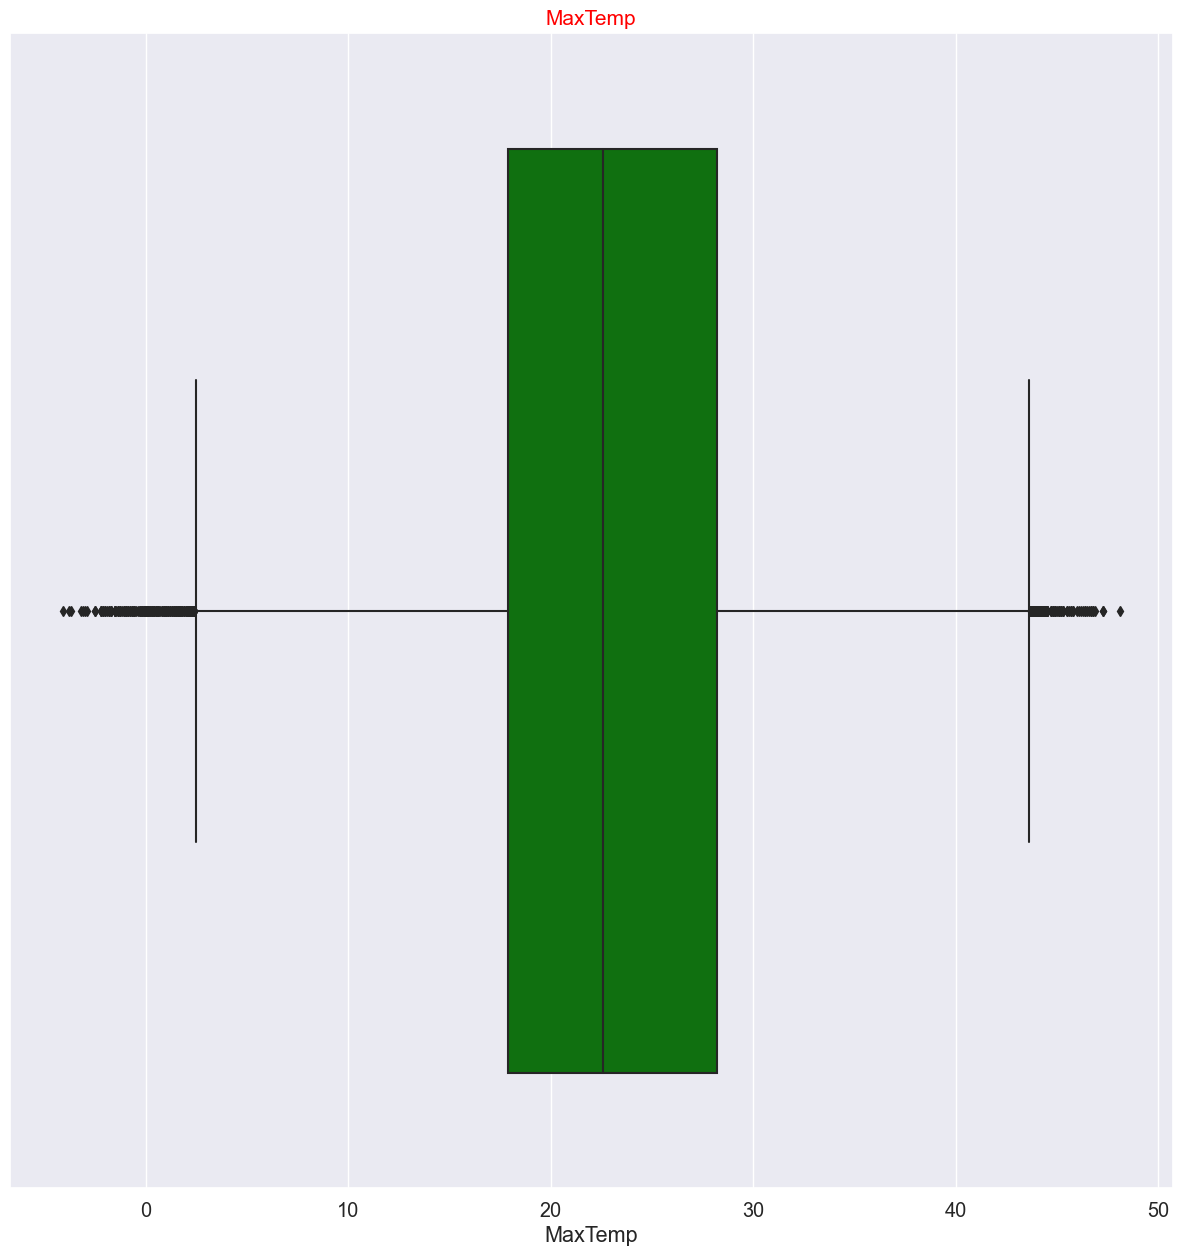

In [101]:
# Box plot of the column MaxTemp
sns.boxplot(df1['MaxTemp'],palette=['green'])
plt.title('MaxTemp',fontsize=15,c='red')
plt.show()

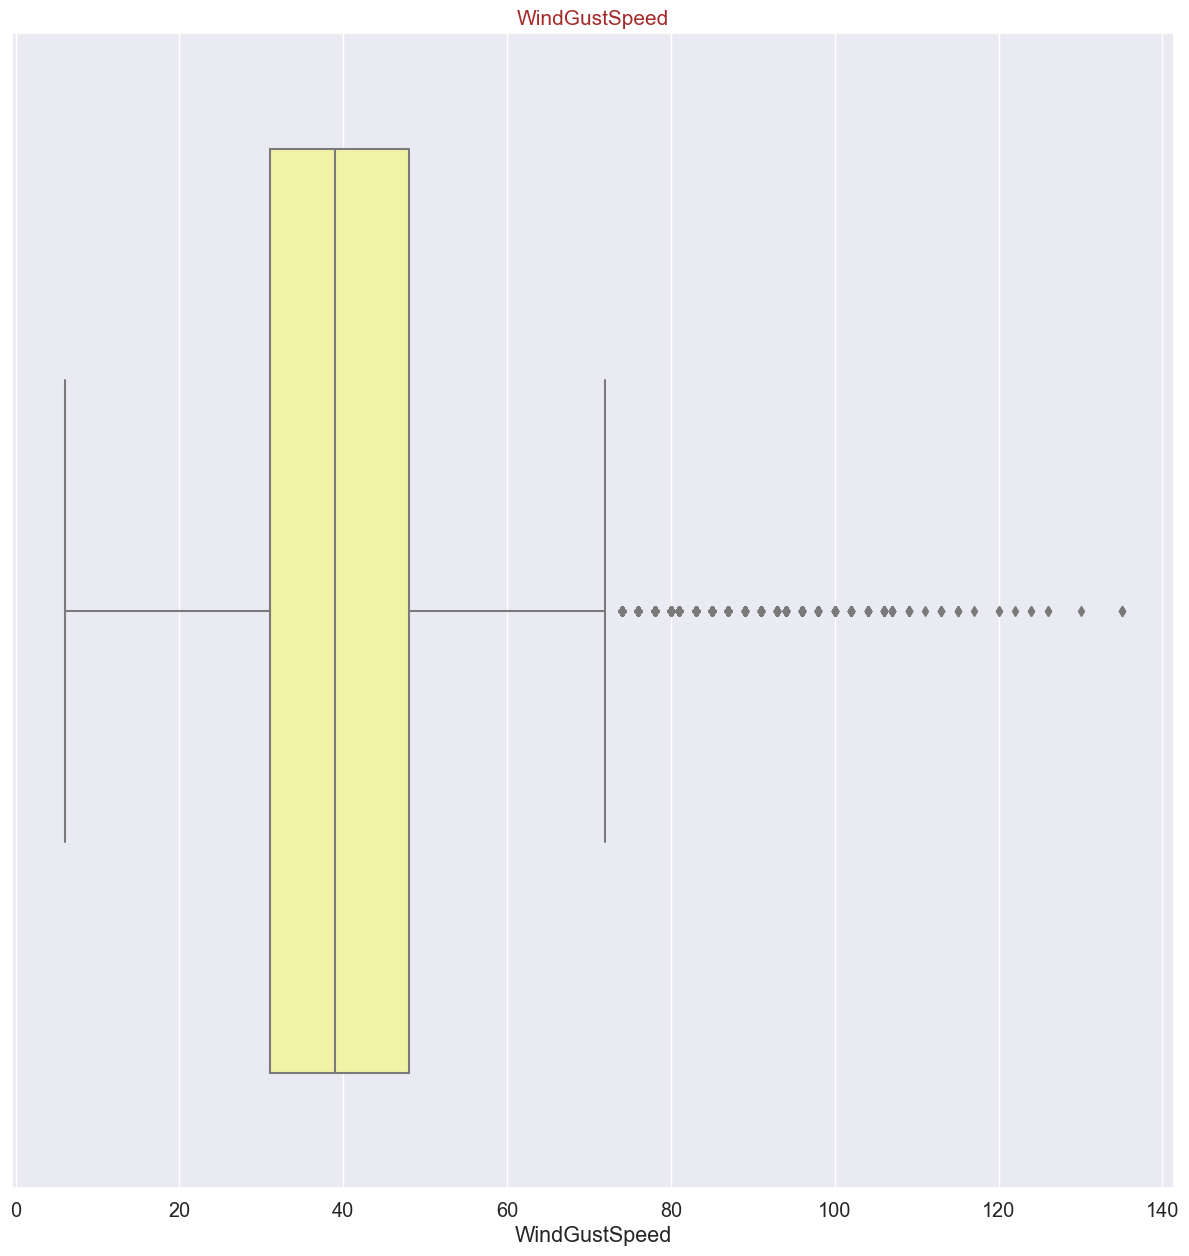

In [102]:
# Box plot of the column WindGustSpeed
sns.boxplot(df['WindGustSpeed'],palette='Accent_r')
plt.title('WindGustSpeed',fontsize=15,c='brown')
plt.show()

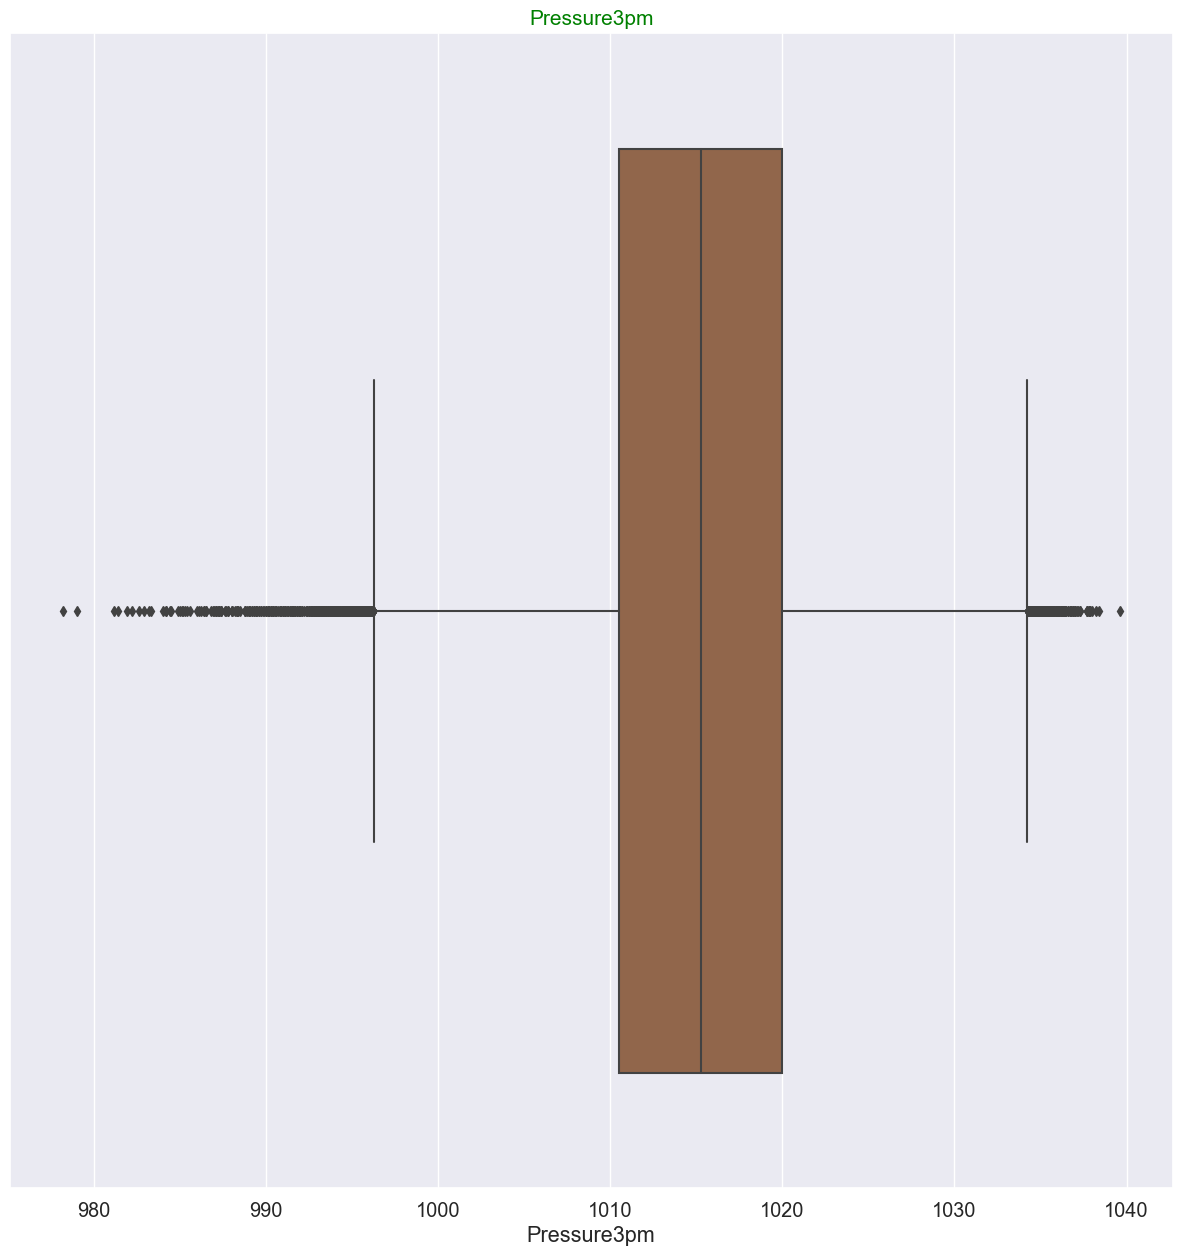

In [103]:
#Box plot of the column Pressure3pm
sns.boxplot(df['Pressure3pm'],palette='copper_r')
plt.title('Pressure3pm',fontsize=15,c='green')
plt.show()

In [104]:
# Finding interquartile range and handling the outliers
features_with_outliers=['MaxTemp','WindGustSpeed','Pressure3pm']
for feature in features_with_outliers:
    Q1=np.percentile(df1[feature],25)
    Q3=np.percentile(df1[feature],75)
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    df1[feature]=np.where(df1[feature]<low_lim,low_lim,np.where(df1[feature]>up_lim,up_lim,df1[feature]))

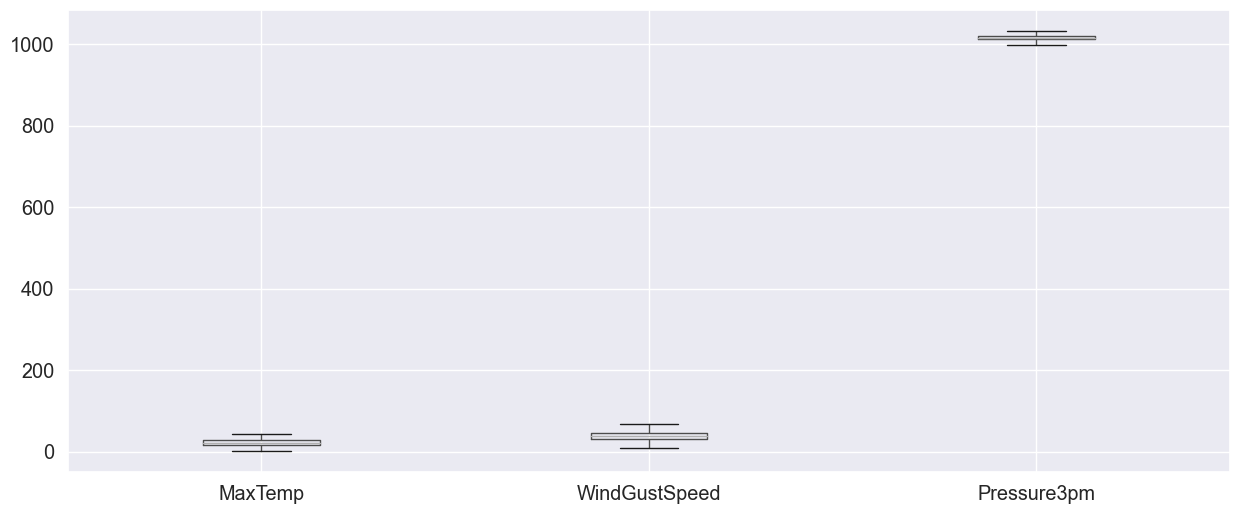

In [105]:
# Box plot after Handling Outliers
df1.boxplot(column=['MaxTemp','WindGustSpeed','Pressure3pm'],figsize=(15,6))
plt.show()

<b>Feature Encoding</b>

In [106]:
# Label Encoding Location,WindDir3pm,WindGustDir and RainToday
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df1['Location']=lab_enc.fit_transform(df1['Location'])
df1['WindDir3pm']=lab_enc.fit_transform(df1['WindDir3pm'])
df1['WindDir9am']=lab_enc.fit_transform(df1['WindDir9am'])
df1['WindGustDir']=lab_enc.fit_transform(df1['WindGustDir'])
df1['RainToday']=lab_enc.fit_transform(df1['RainToday'])

In [107]:
df1

,Location,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity3pm,Pressure3pm,RainToday,RainTomorrow
0,2,22.9,13,44.0,13,14,22.0,1007.1,0,0
1,2,25.1,14,44.0,6,15,25.0,1007.8,0,0
2,2,32.3,13,41.0,1,7,33.0,1006.0,0,0
3,2,29.7,14,56.0,13,13,23.0,1005.4,0,0
4,2,26.7,13,35.0,10,13,19.0,1010.1,0,0
...,...,...,...,...,...,...,...,...,...,...
98532,41,20.7,2,41.0,9,0,32.0,1024.3,0,0
98533,41,21.8,0,31.0,2,0,27.0,1021.2,0,0
98534,41,23.4,0,31.0,9,1,24.0,1020.3,0,0
98535,41,25.3,6,22.0,9,3,21.0,1019.1,0,0


<AxesSubplot:>

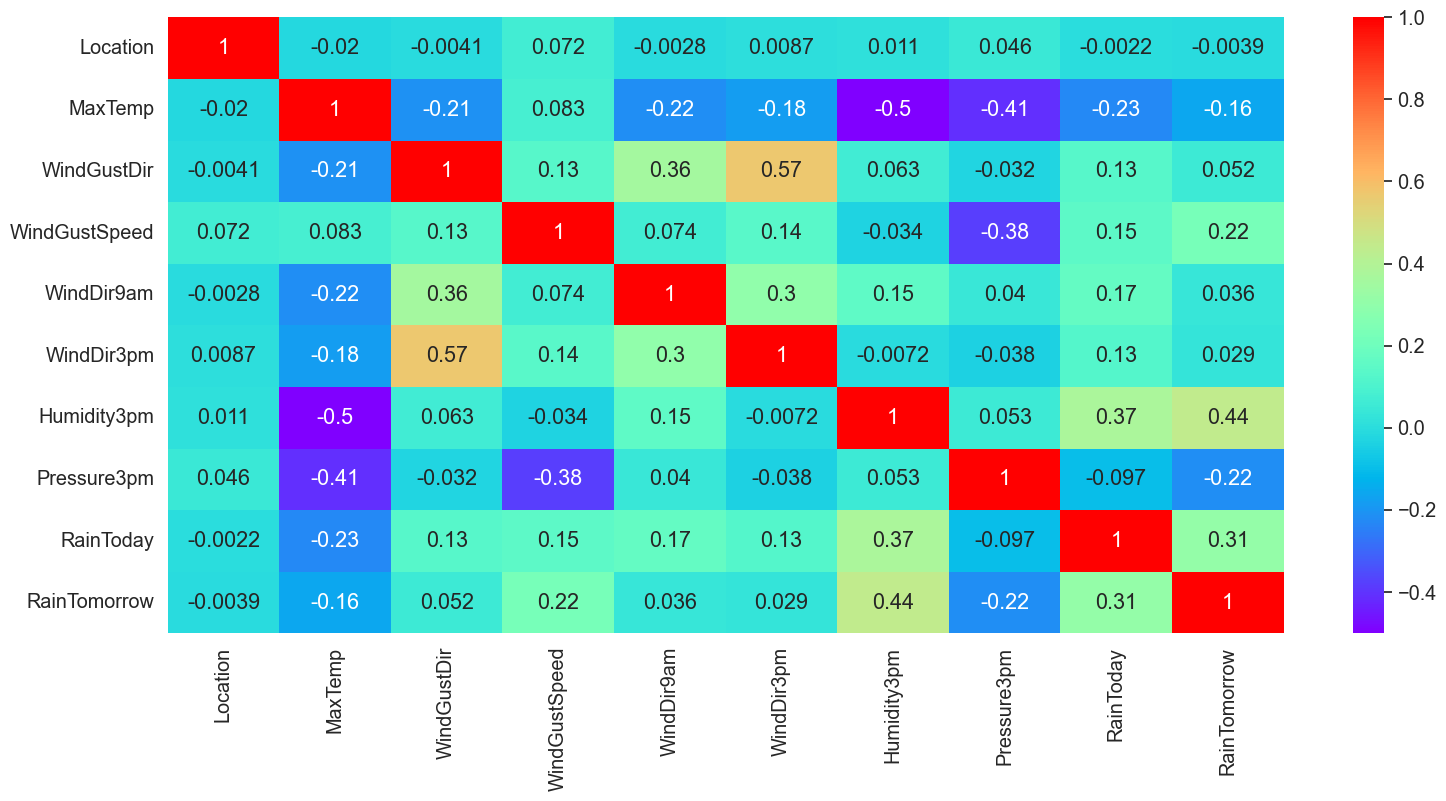

In [108]:
# Correlation plot after Label Encoding
corr_matrix=df1.corr()
plt.subplots(figsize=(18,8))
sns.heatmap(corr_matrix,annot=True,cmap='rainbow')

In [109]:
df1

,Location,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity3pm,Pressure3pm,RainToday,RainTomorrow
0,2,22.9,13,44.0,13,14,22.0,1007.1,0,0
1,2,25.1,14,44.0,6,15,25.0,1007.8,0,0
2,2,32.3,13,41.0,1,7,33.0,1006.0,0,0
3,2,29.7,14,56.0,13,13,23.0,1005.4,0,0
4,2,26.7,13,35.0,10,13,19.0,1010.1,0,0
...,...,...,...,...,...,...,...,...,...,...
98532,41,20.7,2,41.0,9,0,32.0,1024.3,0,0
98533,41,21.8,0,31.0,2,0,27.0,1021.2,0,0
98534,41,23.4,0,31.0,9,1,24.0,1020.3,0,0
98535,41,25.3,6,22.0,9,3,21.0,1019.1,0,0


In [110]:
df1.to_csv('Preprocessed aus_data.csv',index=False)

<b>Feature Selection</b>

<b> At first there were 23 columns in our dataset.Reduced the features to 9.The selected features are Location,MaxTemp,
WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity3pm,Pressure3pm and RainToday for building the model</b>

In [111]:
X=df1.drop(['RainTomorrow'],axis=1)
y=df1['RainTomorrow']

<b>Feature Scaling</b>

In [112]:
#Standard Scaling 
from sklearn.preprocessing import StandardScaler
std_scl=StandardScaler()

In [113]:
X1=X.drop(['Location','WindDir9am','WindDir3pm','WindGustDir','RainToday'],axis=1)

In [114]:
X1=std_scl.fit_transform(X1)

In [115]:
X1=pd.DataFrame(X1,columns=['MaxTemp','WindGustSpeed','Humidity3pm','Pressure3pm'])

In [116]:
X=X.drop(['MaxTemp','WindGustSpeed','Humidity3pm','Pressure3pm'],axis=1)

In [117]:
X=pd.concat([X,X1],axis=1)

In [118]:
X

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,MaxTemp,WindGustSpeed,Humidity3pm,Pressure3pm
0,2,13,13,14,0,-0.046285,0.361178,-1.432427,-1.248508
1,2,14,6,15,0,0.264175,0.361178,-1.286268,-1.141987
2,2,13,1,7,0,1.280228,0.115368,-0.896513,-1.415900
3,2,14,13,13,0,0.913320,1.344418,-1.383707,-1.507204
4,2,13,10,13,0,0.489965,-0.376253,-1.578585,-0.791986
...,...,...,...,...,...,...,...,...,...
98532,41,2,9,0,0,-0.356746,0.115368,-0.945232,1.368885
98533,41,0,2,0,0,-0.201516,-0.704000,-1.188829,0.897145
98534,41,0,9,1,0,0.024274,-0.704000,-1.334988,0.760189
98535,41,6,9,3,0,0.292399,-1.441430,-1.481146,0.577580


# Model

In [119]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.2)

# Creating Logistic Regression Model

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
lr_model=LogisticRegression().fit(X_train,y_train)
y_pred_log=lr_model.predict(X_test)

In [122]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [123]:
confusion_matrix(y_test,y_pred_log)

array([[14481,   819],
       [ 2366,  2042]], dtype=int64)

In [124]:
print('Accuracy score is :',accuracy_score(y_test,y_pred_log))

Accuracy score is : 0.8383905013192612


In [125]:
precision_score(y_test,y_pred_log)

0.7137364557846907

In [126]:
recall_score(y_test,y_pred_log)

0.4632486388384755

In [127]:
f1_score(y_test,y_pred_log)

0.5618379419452469

In [128]:
from sklearn.metrics import classification_report
print('classification_report :\n',classification_report(y_test,y_pred_log))

classification_report :
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     15300
           1       0.71      0.46      0.56      4408

    accuracy                           0.84     19708
   macro avg       0.79      0.70      0.73     19708
weighted avg       0.83      0.84      0.83     19708



# Creating KNN Model

In [129]:
from sklearn.neighbors import KNeighborsClassifier

In [130]:
metric_k=[]
neighbors=range(3,15)

for k in neighbors:
     classifier=KNeighborsClassifier(n_neighbors=k)
     kNN_model=classifier.fit(X_train,y_train)
     y_pred_kNN=kNN_model.predict(X_test)
     acc=accuracy_score(y_test,y_pred_kNN)
     metric_k.append(acc)

In [131]:
metric_k

[0.8174345443474731,
 0.8210878830931602,
 0.8271767810026385,
 0.8242845544956363,
 0.8292064136391313,
 0.8249441851024965,
 0.8289527095595697,
 0.825654556525269,
 0.8302719707732901,
 0.8260097422366551,
 0.8300182666937285,
 0.8266693728435153]

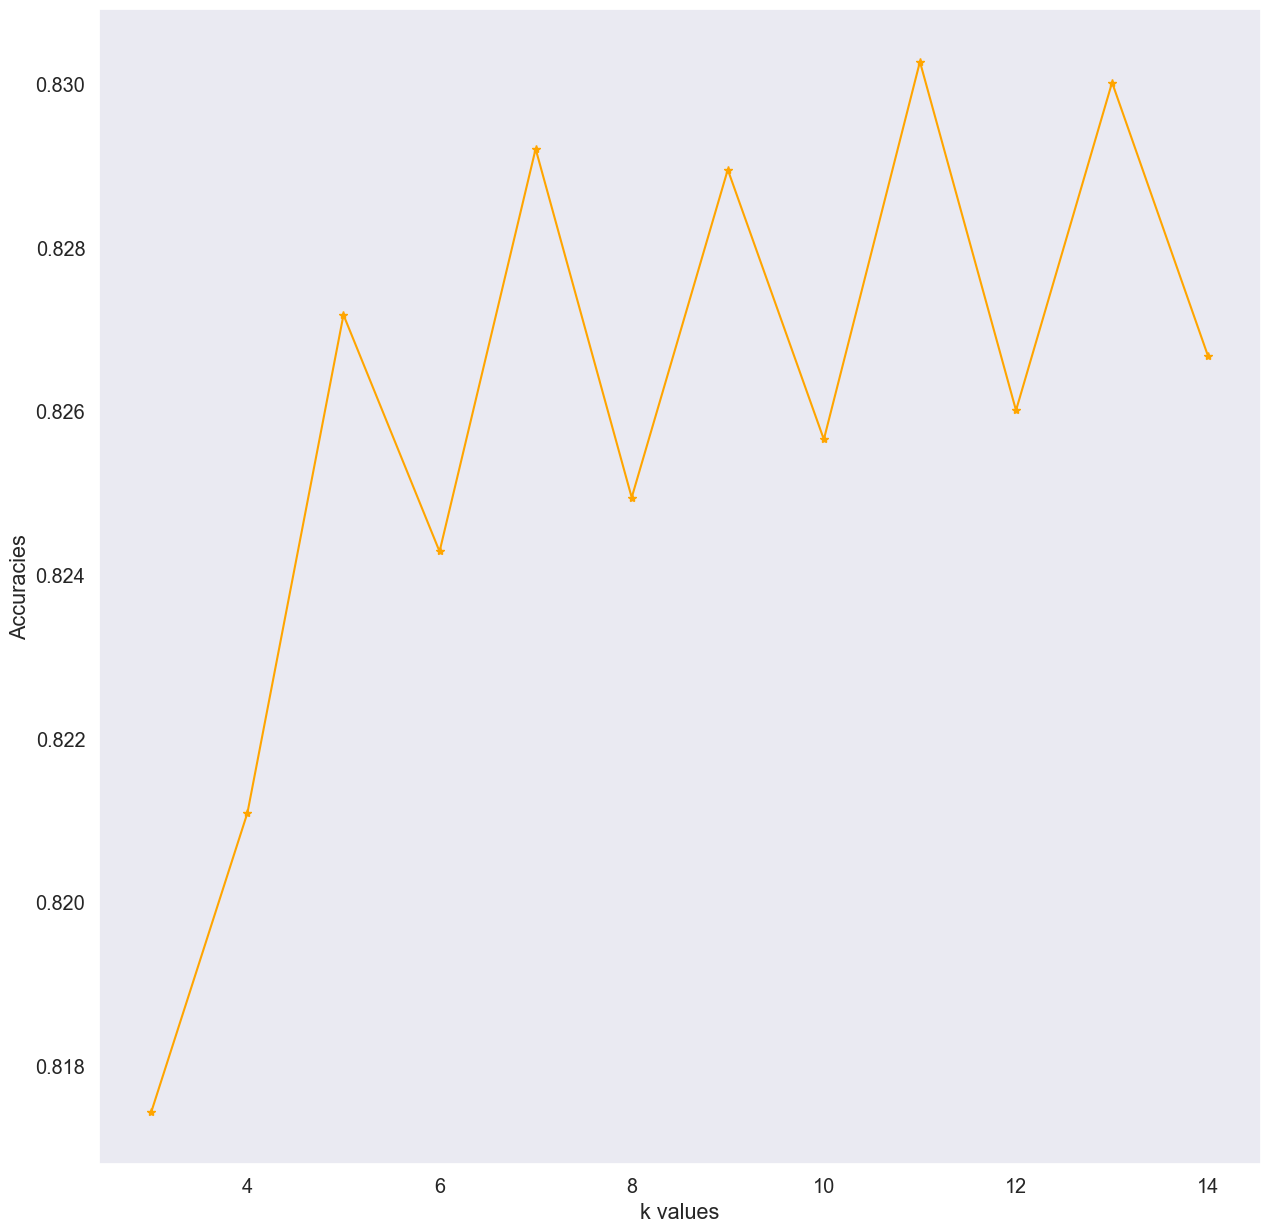

In [132]:
#Plotting Accuracies and k_values
plt.plot(neighbors,metric_k,'*-',c='orange')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()

In [133]:
accuracy_score(y_test,y_pred_kNN)

0.8266693728435153

In [134]:
classifier=KNeighborsClassifier(n_neighbors=11)
kNN_model=classifier.fit(X_train,y_train)
y_pred_kNN=kNN_model.predict(X_test)

In [135]:
confusion_matrix(y_test,y_pred_kNN)

array([[14791,   509],
       [ 2836,  1572]], dtype=int64)

In [136]:
accuracy_score(y_test,y_pred_kNN)

0.8302719707732901

In [137]:
precision_score(y_test,y_pred_kNN)

0.7554060547813551

In [138]:
recall_score(y_test,y_pred_kNN)

0.3566243194192377

In [139]:
f1_score(y_test,y_pred_kNN)

0.4845122515025428

In [140]:
print('classification_report :\n',classification_report(y_test,y_pred_kNN))

classification_report :
               precision    recall  f1-score   support

           0       0.84      0.97      0.90     15300
           1       0.76      0.36      0.48      4408

    accuracy                           0.83     19708
   macro avg       0.80      0.66      0.69     19708
weighted avg       0.82      0.83      0.81     19708



# Creating SVM Model (SVC-Support Vector Classifier)..Linear Kernel

In [141]:
from sklearn.svm import SVC

In [142]:
svm_lin_model=SVC(kernel='linear').fit(X_train,y_train)
y_pred_svm1=svm_lin_model.predict(X_test)

In [143]:
confusion_matrix(y_test,y_pred_svm1)

array([[14608,   692],
       [ 2478,  1930]], dtype=int64)

In [144]:
accuracy_score(y_test,y_pred_svm1)

0.839151613557946

In [145]:
precision_score(y_test,y_pred_svm1)

0.7360793287566743

In [146]:
recall_score(y_test,y_pred_svm1)

0.4378402903811252

In [147]:
f1_score(y_test,y_pred_svm1)

0.5490753911806544

In [148]:
print('classification_report :\n',classification_report(y_test,y_pred_svm1))

classification_report :
               precision    recall  f1-score   support

           0       0.85      0.95      0.90     15300
           1       0.74      0.44      0.55      4408

    accuracy                           0.84     19708
   macro avg       0.80      0.70      0.73     19708
weighted avg       0.83      0.84      0.82     19708



# Creating SVM Model  .....RBF (Radial Basis Function Kernel) 

In [149]:
svm_rbf_model=SVC(kernel='rbf').fit(X_train,y_train)
y_pred_svm2=svm_rbf_model.predict(X_test)

In [150]:
confusion_matrix(y_test,y_pred_svm2)

array([[14698,   602],
       [ 2534,  1874]], dtype=int64)

In [151]:
accuracy_score(y_test,y_pred_svm2)

0.8408768012989649

In [152]:
precision_score(y_test,y_pred_svm2)

0.7568659127625202

In [153]:
recall_score(y_test,y_pred_svm2)

0.4251361161524501

In [154]:
f1_score(y_test,y_pred_svm2)

0.5444509006391632

In [155]:
print('classification_report :\n',classification_report(y_test,y_pred_svm2))

classification_report :
               precision    recall  f1-score   support

           0       0.85      0.96      0.90     15300
           1       0.76      0.43      0.54      4408

    accuracy                           0.84     19708
   macro avg       0.80      0.69      0.72     19708
weighted avg       0.83      0.84      0.82     19708



# Creating DecisionTreeClassifier Model

In [156]:
X=df1.drop(['RainTomorrow'],axis=1)
y=df1['RainTomorrow']

In [157]:
# Splitting into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.2)

In [158]:
from sklearn.tree import DecisionTreeClassifier

In [159]:
dec_tree_model=DecisionTreeClassifier().fit(X_train,y_train)
y_pred_tree=dec_tree_model.predict(X_test)

In [160]:
confusion_matrix(y_test,y_pred_tree)

array([[13039,  2261],
       [ 2115,  2293]], dtype=int64)

In [161]:
accuracy_score(y_test,y_pred_tree)

0.7779581895676883

In [162]:
precision_score(y_test,y_pred_tree)

0.5035133948177426

In [163]:
recall_score(y_test,y_pred_tree)

0.5201905626134301

In [164]:
f1_score(y_test,y_pred_tree)

0.511716134791341

In [165]:
print('classification_report :\n',classification_report(y_test,y_pred_tree))

classification_report :
               precision    recall  f1-score   support

           0       0.86      0.85      0.86     15300
           1       0.50      0.52      0.51      4408

    accuracy                           0.78     19708
   macro avg       0.68      0.69      0.68     19708
weighted avg       0.78      0.78      0.78     19708



# Creating RandomForestClassifier Model

In [166]:
from sklearn.ensemble import RandomForestClassifier

In [167]:
rand_for_model=RandomForestClassifier().fit(X_train,y_train)
y_pred_rand=rand_for_model.predict(X_test)

In [169]:
confusion_matrix(y_test,y_pred_rand)

array([[14512,   788],
       [ 2201,  2207]], dtype=int64)

In [168]:
accuracy_score(y_test,y_pred_rand)

0.8483357012380759

In [170]:
precision_score(y_test,y_pred_rand)

0.7368948247078464

In [171]:
recall_score(y_test,y_pred_rand)

0.5006805807622504

In [172]:
f1_score(y_test,y_pred_rand)

0.5962447656355532

In [173]:
print('classification_report :\n',classification_report(y_test,y_pred_rand))

classification_report :
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     15300
           1       0.74      0.50      0.60      4408

    accuracy                           0.85     19708
   macro avg       0.80      0.72      0.75     19708
weighted avg       0.84      0.85      0.84     19708



# Creating GradientBoostingClassifier Model

In [174]:
from sklearn.ensemble import GradientBoostingClassifier

In [175]:
grad_boost_model=GradientBoostingClassifier().fit(X_train,y_train)
y_pred_grad=grad_boost_model.predict(X_test)

In [176]:
confusion_matrix(y_test,y_pred_grad)

array([[14575,   725],
       [ 2309,  2099]], dtype=int64)

In [177]:
accuracy_score(y_test,y_pred_grad)

0.8460523645220215

In [178]:
precision_score(y_test,y_pred_grad)

0.7432719546742209

In [179]:
recall_score(y_test,y_pred_grad)

0.4761796733212341

In [180]:
f1_score(y_test,y_pred_grad)

0.5804756637168141

In [181]:
print('classification_report :\n',classification_report(y_test,y_pred_grad))

classification_report :
               precision    recall  f1-score   support

           0       0.86      0.95      0.91     15300
           1       0.74      0.48      0.58      4408

    accuracy                           0.85     19708
   macro avg       0.80      0.71      0.74     19708
weighted avg       0.84      0.85      0.83     19708



# Creating Naive Bayes Classification Model

In [182]:
from sklearn.naive_bayes import GaussianNB

In [183]:
gaus_nb_model=GaussianNB().fit(X_train,y_train)
y_pred_gaus=gaus_nb_model.predict(X_test)

In [184]:
accuracy_score(y_test,y_pred_gaus)

0.80774304850822

In [185]:
precision_score(y_test,y_pred_gaus)

0.5724994143827594

In [186]:
recall_score(y_test,y_pred_gaus)

0.5544464609800362

In [187]:
f1_score(y_test,y_pred_gaus)

0.5633283392877723

In [188]:
print('classification_report :\n',classification_report(y_test,y_pred_gaus))

classification_report :
               precision    recall  f1-score   support

           0       0.87      0.88      0.88     15300
           1       0.57      0.55      0.56      4408

    accuracy                           0.81     19708
   macro avg       0.72      0.72      0.72     19708
weighted avg       0.81      0.81      0.81     19708



 Random Forest Classification Model has the highest F1 score and accuracy score

# Fine Tuning RandomForestClassifier Model

In [189]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [190]:
rand_for_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

<b>Hyperparameter Tuning-GridSearchCV</b>

In [191]:
parameters={'n_estimators':[50,100,150,250],'max_depth':[3,6,9,None]}

In [192]:
grid_model=GridSearchCV(RandomForestClassifier(),parameters,scoring='f1')
grid_model.fit(X_train,y_train)
print(grid_model.best_params_)

{'max_depth': None, 'n_estimators': 250}


In [193]:
model_grid=RandomForestClassifier(n_estimators=250,max_depth=None)
model1=model_grid.fit(X_train,y_train)
y_pred_grid=model1.predict(X_test)

In [195]:
accuracy_score(y_test,y_pred_grid)

0.8494012583722347

In [194]:
precision_score(y_test,y_pred_grid)

0.7401601067378252

In [196]:
recall_score(y_test,y_pred_grid)

0.5034029038112523

In [197]:
f1_score(y_test,y_pred_grid)

0.5992438563327032

In [198]:
print('classification_report :\n',classification_report(y_test,y_pred_grid))

classification_report :
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     15300
           1       0.74      0.50      0.60      4408

    accuracy                           0.85     19708
   macro avg       0.80      0.73      0.75     19708
weighted avg       0.84      0.85      0.84     19708



<b>Hyperparameter Tuning-RandomizedSearchCV</b>

In [205]:
random_model=RandomizedSearchCV(RandomForestClassifier(),parameters,scoring='f1')
random_model.fit(X_train,y_train)
print(random_model.best_params_)

{'n_estimators': 250, 'max_depth': None}


In [206]:
model_random=RandomForestClassifier(n_estimators=250,max_depth=None)
model2=model_random.fit(X_train,y_train)
y_pred_random=model2.predict(X_test)

In [207]:
accuracy_score(y_test,y_pred_random)

0.849451999188147

In [208]:
precision_score(y_test,y_pred_random)

0.7407283661877715

In [209]:
recall_score(y_test,y_pred_random)

0.5029491833030852

In [210]:
f1_score(y_test,y_pred_random)

0.5991082286177543

In [211]:
print('classification_report :\n',classification_report(y_test,y_pred_random))

classification_report :
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     15300
           1       0.74      0.50      0.60      4408

    accuracy                           0.85     19708
   macro avg       0.80      0.73      0.75     19708
weighted avg       0.84      0.85      0.84     19708



In [ ]:
# Selected Random Forest Classification RandomizedSearchCV Fine tuned Model for Webhosting
# Hence fitting this model to X and y ,then saving and loading this model using pickle module

In [212]:
model_random=RandomForestClassifier(n_estimators=250,max_depth=None)
model_random.fit(X,y)

RandomForestClassifier(n_estimators=250)

In [213]:
import pickle

In [214]:
pickle.dump(model_random,open('randomcv_model.pkl','wb'))

In [215]:
model=pickle.load(open('randomcv_model.pkl','rb'))

In [ ]:
# Checking the predictions of the pickle model

In [216]:
model.predict([[2,22.9,13,44,13,14,22,1007.1,0]])

array([0], dtype=int64)

In [217]:
model.predict([[2,26.7,13,35.0,10,13,19.0,1010.1,0]])

array([0], dtype=int64)

In [212]:
df1.head(7)

,Location,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity3pm,Pressure3pm,RainToday,RainTomorrow
0,2,22.9,13,44.0,13,14,22.0,1007.1,0,0
1,2,25.1,14,44.0,6,15,25.0,1007.8,0,0
2,2,32.3,13,41.0,1,7,33.0,1006.0,0,0
3,2,29.7,14,56.0,13,13,23.0,1005.4,0,0
4,2,26.7,13,35.0,10,13,19.0,1010.1,0,0
5,2,30.1,13,28.0,8,10,27.0,1005.7,1,0
6,2,30.4,3,30.0,10,2,22.0,1008.7,0,1


In [218]:
model.predict([[2,30.4,3,30.0,10,2,22.0,1008.7,0]])

array([1], dtype=int64)